# Working with MEG dataset
MEG dataset from THINGS initiative: https://openneuro.org/datasets/ds004212/versions/2.0.1
### Training data partition
The data is .fif file which needs to be converted into a rather easy to use .npy array.
We will use mne library for this: https://mne.tools/dev/index.html 


We collected extensively sampled object representations using magnetoencephalography (MEG). To this end, we drew on the THINGS database (Hebart et al., 2019), a richly-annotated database of 1,854 object concepts representative of the American English language which contains 26,107 manually-curated naturalistic object images.

ERP = event-related potential; signal with respect to some event
VEP = ERP for visual stimuli



27084 events, 281 time points, 271 channels

## Here we perform clustering experiements

In [1]:
import numpy as np
import mne, os
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import matplotlib.image as mpimg
# import nimfa
from sklearn.cluster import KMeans


In [2]:
channel_picks               = ['O','T','P']
file_path_3 = 'preprocessed/p3/preprocessed_P3-epo.fif'
file_path_2 = 'preprocessed/p2/preprocessed_P2-epo.fif'
file_path_1 = 'preprocessed/p1/preprocessed_P1-epo.fif'      
preproc_dir = 'preprocessed'

n_participants = 3
def load_epochs(preproc_dir,all_epochs = []):
    for p in range(1,n_participants+1):
        epochs = mne.read_epochs(f'{preproc_dir}/preprocessed_P{str(p)}-epo.fif', preload=False)
        all_epochs.append(epochs)
    return all_epochs

def plot_erfs(epochs,n_sessions,name):
    ctf_layout = mne.find_layout(epochs.info)
    picks_epochs = [epochs.ch_names[i] for i in np.where([s[2]==name for s in epochs.ch_names])[0]]
    picks = np.where([i[2]==name for i in ctf_layout.names])[0]

    # get evoked data
    for s in range(n_sessions):    
        evoked = epochs[(epochs.metadata['trial_type']=='test') & (epochs.metadata['session_nr']==s+1)].average()
        evoked.pick_channels(ch_names=picks_epochs)
        plt.plot(epochs.times*1000,np.mean(evoked.data.T,axis=1),lw=0.5,alpha=0.4)
    evoked = epochs[(epochs.metadata['trial_type']=='test')].average()
    evoked.pick_channels(ch_names=picks_epochs)

    # plot ERFs for selected sensor group
    plt.plot(epochs.times*1000,np.mean(evoked.data.T,axis=1),lw=1)
    plt.xlim([epochs.times[0]*1000,epochs.times[len(epochs.times)-1]*1000])
    plt.ylim([-0.6,0.6])
    # plt.['right'].set_visible(False)
    # plt.spines['top'].set_visible(False)

    #  plot sensor locations
    # ax2.plot(ctf_layout.pos[:,0],ctf_layout.pos[:,1],color='gainsboro',marker='.',linestyle='',markersize=5)
    # ax2.plot(ctf_layout.pos[picks,0],ctf_layout.pos[picks,1],color='grey',marker='.',linestyle='',markersize=5)
    # ax2.set_aspect('equal')
    plt.axis('off')


In [3]:
all_epochs = load_epochs(preproc_dir)

Reading /home/asuryawanshi/Documents/THINGS/MEG/preprocessed/preprocessed_P1-epo.fif ...
    Found the data of interest:
        t =    -100.00 ...    1300.00 ms
        0 CTF compensation matrices available
Reading /home/asuryawanshi/Documents/THINGS/MEG/preprocessed/preprocessed_P1-epo-1.fif ...
    Found the data of interest:
        t =    -100.00 ...    1300.00 ms
        0 CTF compensation matrices available
Reading /home/asuryawanshi/Documents/THINGS/MEG/preprocessed/preprocessed_P1-epo-2.fif ...
    Found the data of interest:
        t =    -100.00 ...    1300.00 ms
        0 CTF compensation matrices available
Reading /home/asuryawanshi/Documents/THINGS/MEG/preprocessed/preprocessed_P1-epo-3.fif ...
    Found the data of interest:
        t =    -100.00 ...    1300.00 ms
        0 CTF compensation matrices available
Adding metadata with 18 columns
27048 matching events found
No baseline correction applied
0 projection items activated
Reading /home/asuryawanshi/Documents/THING

In [4]:
#*****************************#
### PARAMETERS ###
#*****************************#
n_participants              = 3
n_sessions                  = 12
n_images                    = 200
channel_picks               = ['O','T','P']
title_names                 = ['Occipital','Temporal','Parietal']
colors                      = ['mediumseagreen','steelblue','goldenrod','indianred','grey']
plt.rcParams['font.size']   = '16'



NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy functi

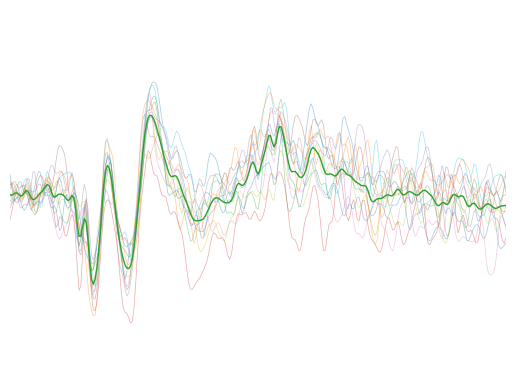

In [5]:
plot_erfs(all_epochs[1],n_sessions,'O')

In [6]:
all_epochs[0];
# epochs_0 = all_epochs[0]
epochs = all_epochs[2]

In [7]:
epochs.metadata

trial_type  image_nr  category_nr  exemplar_nr  test_image_nr  \
0            exp        66            6            6            NaN   
1            exp     19722         1644            6            NaN   
2            exp      9990          833            6            NaN   
3            exp     18114         1510            6            NaN   
4            exp     21630         1803            6            NaN   
...          ...       ...          ...          ...            ...   
27043       test     22509          874           13           61.0   
27044        exp      1928          161            8            NaN   
27045        exp     12380         1032            8            NaN   
27046        exp      4736          395            8            NaN   
27047        exp     12308         1026            8            NaN   

       things_category_nr  things_image_nr  things_exemplar_nr  \
0                     6.0             77.0                 6.0   
1                  1644.0          23212.0                 6.0   
2                   833.0          11909.0                 6.0   
3                  1510.0          21355.0                 6.0   
4                  1803.0          25403.0                 6.0   
...                   ...              ...                 ...   
27043               874.0          12520.0                14.0   
27044               161.0           2461.0                 8.0   
27045              1032.0          14716.0                 8.0   
27046               395.0           5685.0                 8.0   
27047              1026.0          14624.0                 8.0   

                                         image_path   onset    image_on  \
0      images_meg/air_mattress/air_mattress_06s.jpg    3.00    3.007379   
1                      images_meg/tent/tent_06s.jpg    4.60    4.608000   
2                      images_meg/iron/iron_06s.jpg    5.90    6.158647   
3                images_meg/speaker/speaker_06s.jpg    7.55    7.559094   
4                      images_meg/weed/weed_06s.jpg    9.05    9.109738   
...                                             ...     ...         ...   
27043                images_test_meg/kimono_14s.jpg  333.25  333.271450   
27044                  images_meg/bomb/bomb_08s.jpg  334.60  334.821982   
27045                images_meg/mouth/mouth_08s.jpg  335.90  336.189182   
27046          images_meg/computer/computer_08s.jpg  337.45  337.473051   
27047      images_meg/motorcycle/motorcycle_08s.jpg  338.90  339.023669   

        image_off  responded  key_id  key_time  RT  session_nr  run_nr  
0        3.507551          0     NaN       NaN NaN           1       1  
1        5.108164          0     NaN       NaN NaN           1       1  
2        6.658820          0     NaN       NaN NaN           1       1  
3        8.059242          0     NaN       NaN NaN           1       1  
4        9.609925          0     NaN       NaN NaN           1       1  
...           ...        ...     ...       ...  ..         ...     ...  
27043  333.771659          0     NaN       NaN NaN          12      10  
27044  335.322292          0     NaN       NaN NaN          12      10  
27045  336.689494          0     NaN       NaN NaN          12      10  
27046  337.973265          0     NaN       NaN NaN          12      10  
27047  339.523893          0     NaN       NaN NaN          12      10  

[27048 rows x 18 columns]

In [8]:
name = channel_picks[0]
print(name, channel_picks)
# ctf_layout = mne.find_layout(epochs.info)
picks_epochs = [epochs.ch_names[i] for i in np.where([s[2]==name for s in epochs.ch_names])[0]]
ep1 = epochs[epochs.metadata['trial_type']=='exp']  
ep1.load_data() 
ep1.pick_channels(ch_names=picks_epochs); # supress output


O ['O', 'T', 'P']


Loading data for 22248 events and 281 original time points ...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


In [11]:
NOS_CONCEPTS = 1854
NOS_IMAGE_PER_CONCEPT = 12
NOS_CHANNELS_OPT = 39
NOS_TIME_POINTS = 281
time_points = epochs.times 

In [12]:
# Load concept epochs if they already exist
if os.path.exists('concept_epochs.npy'):
    concept_epochs = np.load('concept_epochs.npy')
else:
    # Initialize the concept_epochs array with zeros
    concept_epochs = np.zeros((NOS_IMAGE_PER_CONCEPT, NOS_CONCEPTS, NOS_TIME_POINTS, NOS_CHANNELS_OPT))
    
    # Extract all data matching the condition in one go
    indices = ep1.metadata['category_nr'].values - 1  # Adjust index (assuming category_nr starts at 1)
    concept_epochs[:, indices, :, :] = ep1._data.transpose(0, 2, 1)
    
    # Save the array
    np.save('concept_epochs.npy', concept_epochs)

In [13]:
concept_epochs.shape

(12, 1854, 281, 39)

In [14]:
average_concept_epochs = concept_epochs.mean(axis = 0)
average_concept_epochs.shape

(1854, 281, 39)

In [15]:
# # z_scored_epochs = np.zeros_like(average_concept_epochs)
# for channel in range(NOS_CHANNELS_OPT):
#     mean = average_concept_epochs[:,channel,:].mean()
#     stdev = average_concept_epochs[:,channel,:].std()
#     average_concept_epochs[:,channel,:] = (average_concept_epochs[:,channel,:] - mean) / stdev

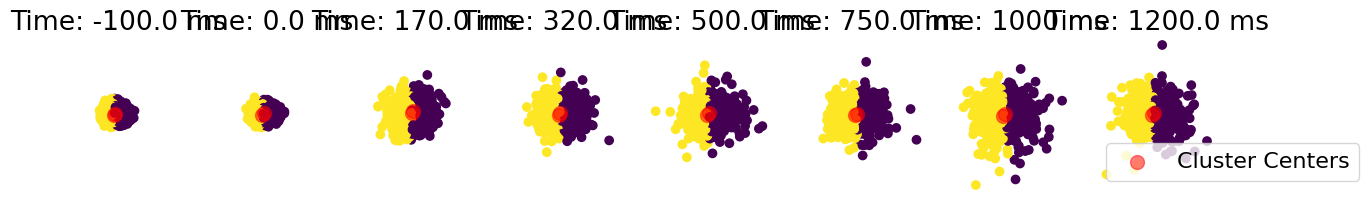

In [16]:
times = [-0.1,0.0,0.170, 0.320, 0.5, 0.75, 1, 1.2]
f, axes = plt.subplots(1, len(times), sharex=True, sharey = True, figsize=(15, 2))   
for i,t in enumerate(times):
    index = epochs.times == t
    data = average_concept_epochs[:, index, :].squeeze() 
    # print(data.shape)
    kmeans = KMeans(n_clusters=2).fit(data)
    labels = kmeans.labels_
    # Get cluster centers
    centers = kmeans.cluster_centers_  # Shape: (2, 39)

    # Example Output
    # print("Labels Shape:", labels.shape)  # (1854,)
    # print("Cluster Centers Shape:", centers.shape)  # (2, 39)

    from sklearn.decomposition import PCA
    import matplotlib.pyplot as plt

    # Reduce to 2D for visualization
    pca = PCA(n_components=2, random_state= 42)
    data_2d = pca.fit_transform(data)
    # print(data_2d.shape)  
    axes[i].scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='viridis')
    axes[i].scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.5, label='Cluster Centers')
    axes[i].set_title(f"Time: {t*1000} ms")
    axes[i].axis('off')
plt.legend()
plt.show()

  0%|          | 0/27 [00:00<?, ?it/s]

8it [00:00, 48.60it/s]


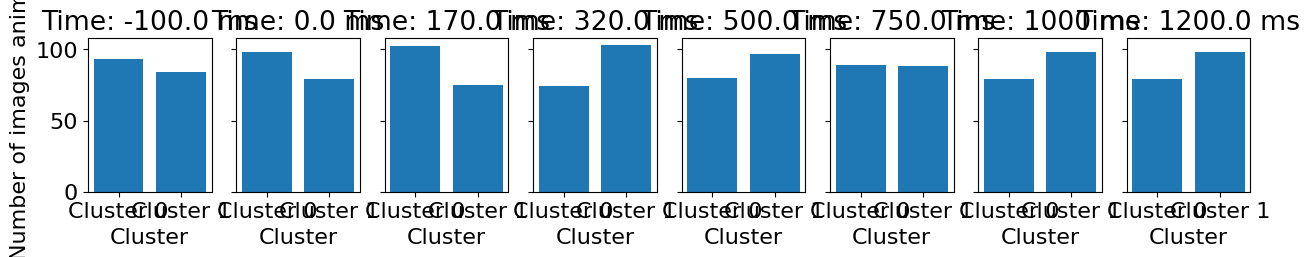

8it [00:00, 23.15it/s][00:00<00:16,  1.57it/s]


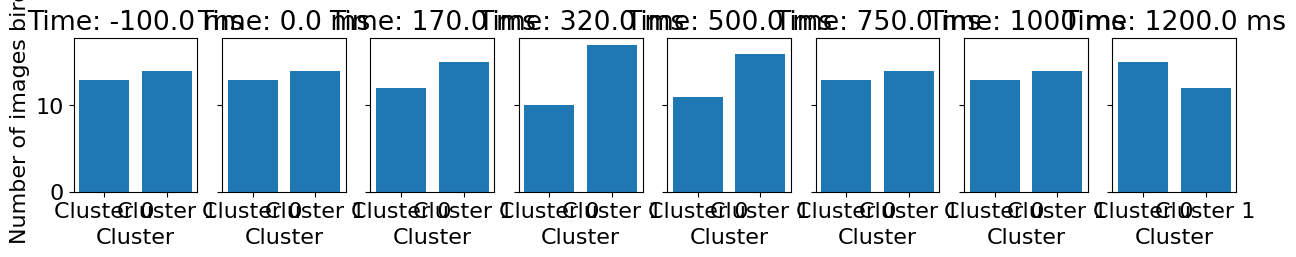

8it [00:00, 19.63it/s][00:01<00:16,  1.48it/s]


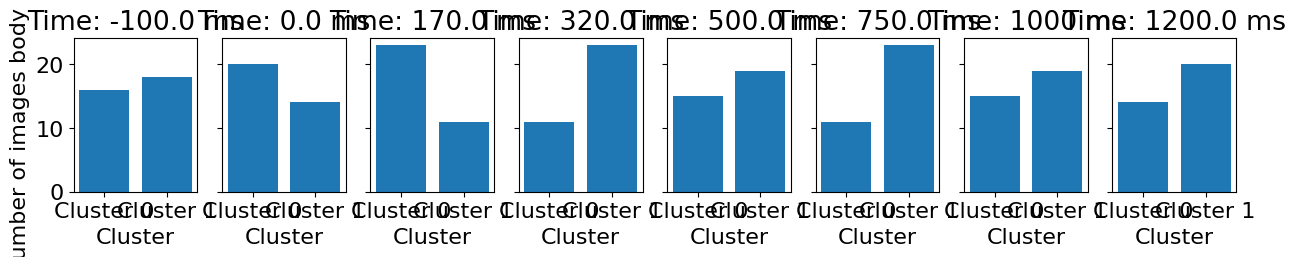

8it [00:00, 15.89it/s][00:02<00:17,  1.38it/s]


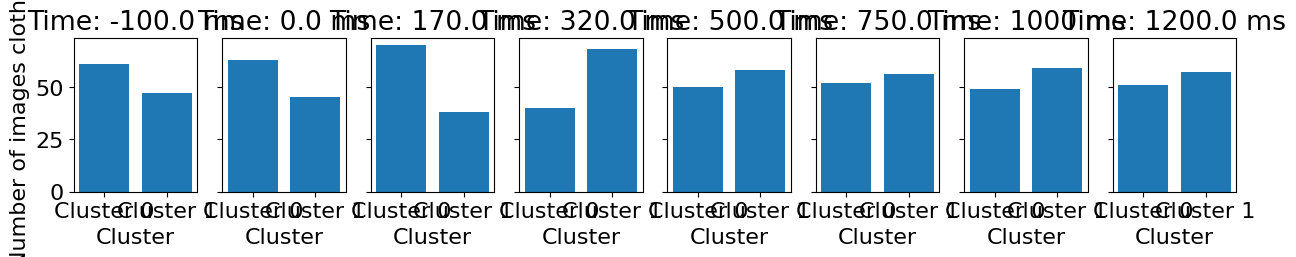

8it [00:00, 27.04it/s][00:02<00:17,  1.32it/s]


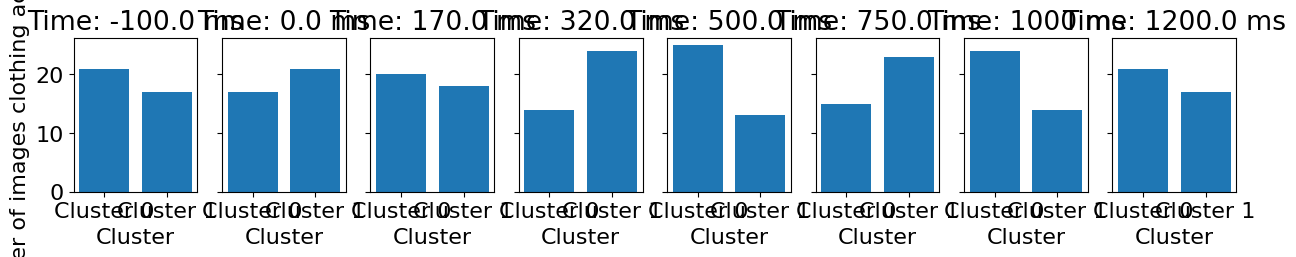

8it [00:00, 27.02it/s][00:03<00:15,  1.40it/s]


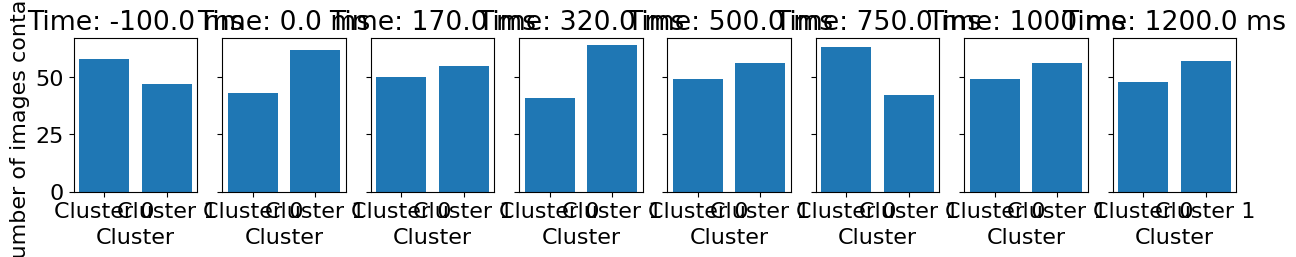

8it [00:00, 27.01it/s][00:04<00:15,  1.35it/s]


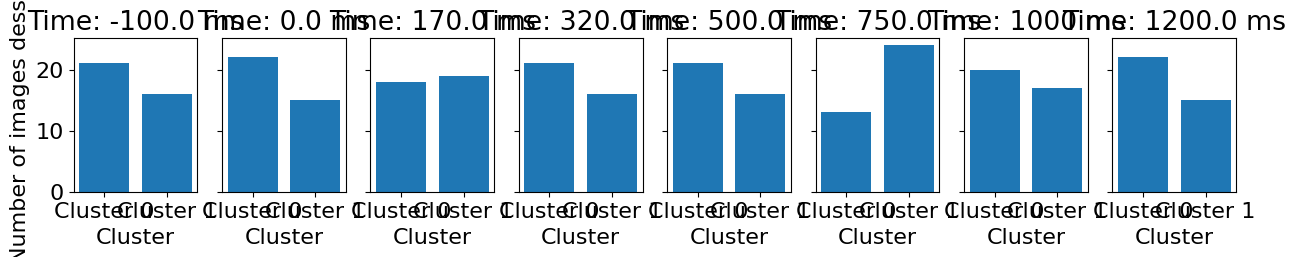

8it [00:00, 57.56it/s][00:04<00:13,  1.45it/s]


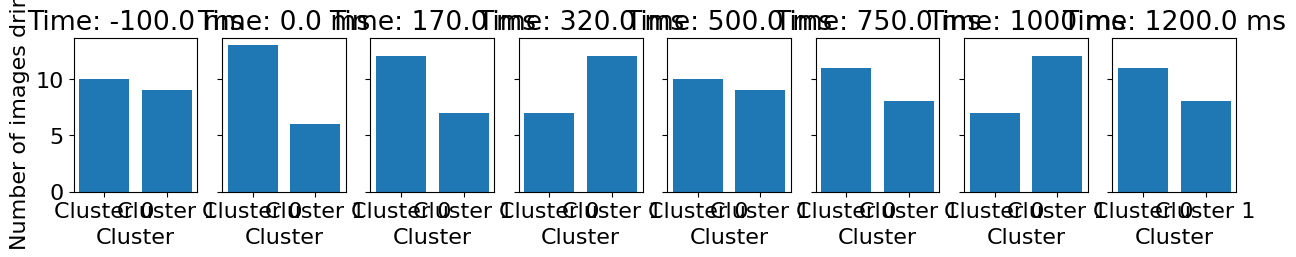

8it [00:00, 53.97it/s][00:05<00:11,  1.61it/s]


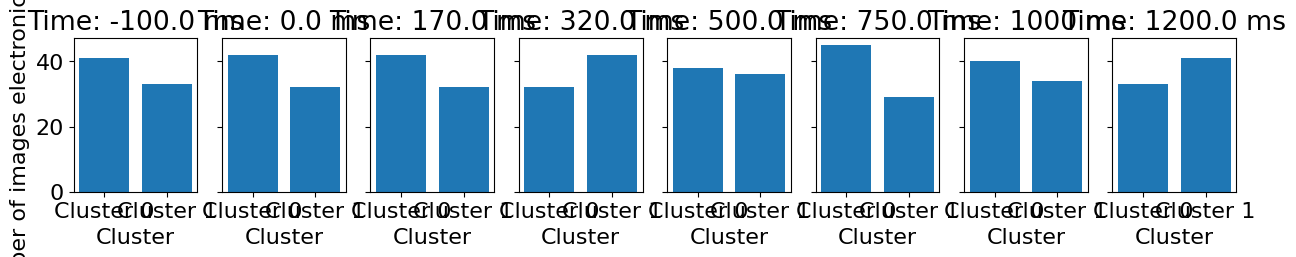

8it [00:00, 57.65it/s][00:05<00:10,  1.68it/s]


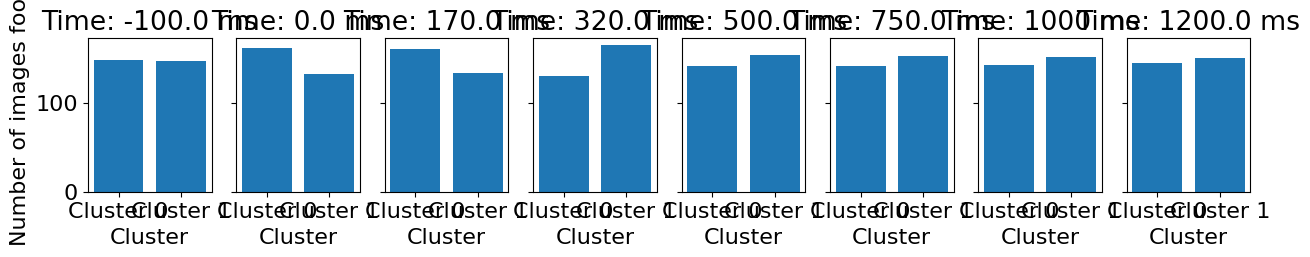

8it [00:00, 54.14it/s] [00:06<00:09,  1.76it/s]


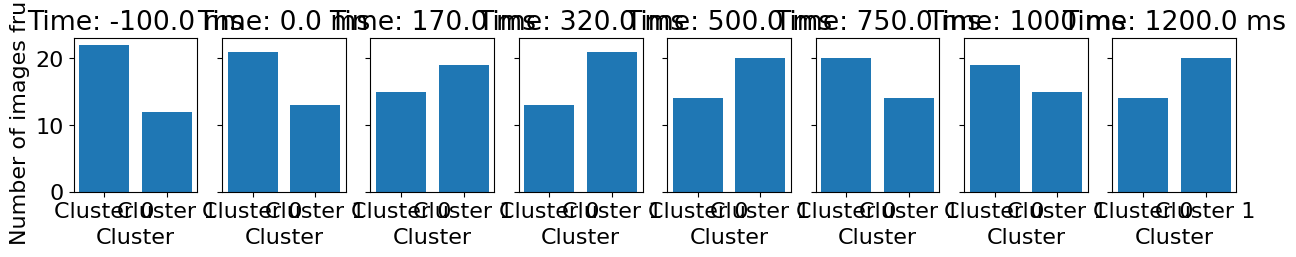

8it [00:00, 47.96it/s] [00:07<00:09,  1.67it/s]


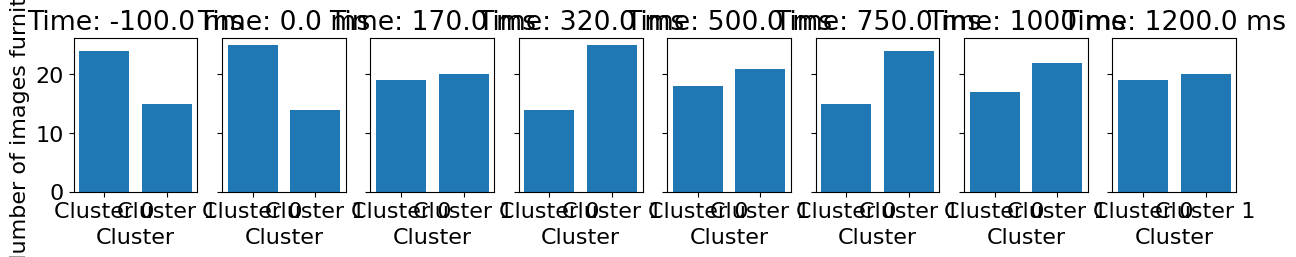

8it [00:00, 55.26it/s] [00:07<00:08,  1.72it/s]


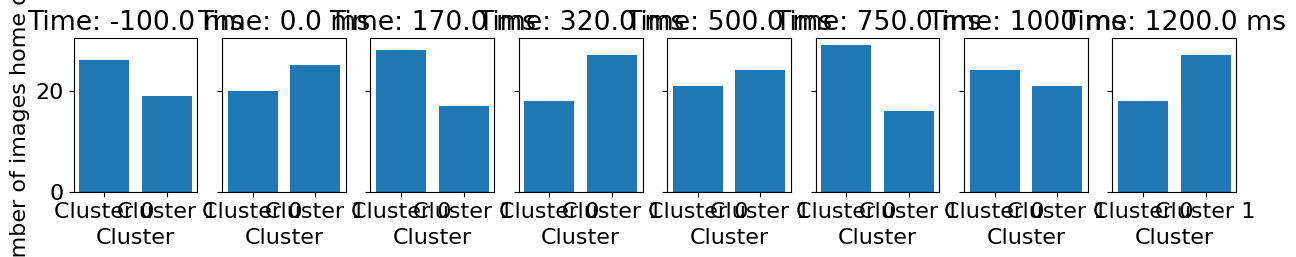

8it [00:00, 23.68it/s] [00:08<00:07,  1.86it/s]


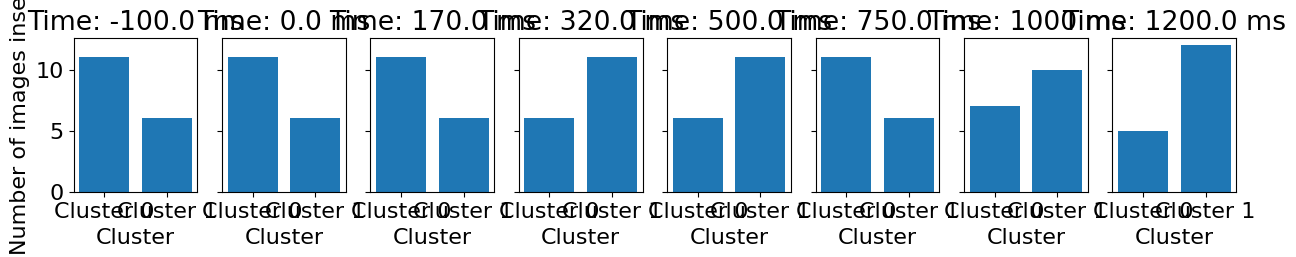

8it [00:00, 30.24it/s] [00:08<00:07,  1.76it/s]


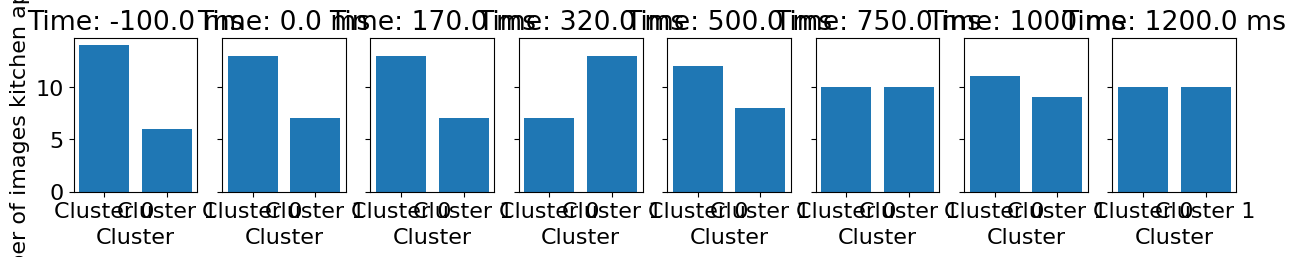

8it [00:00, 52.18it/s] [00:09<00:07,  1.69it/s]


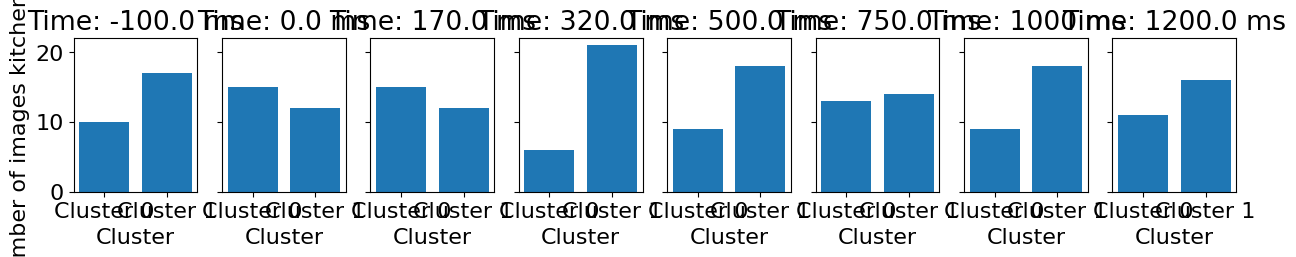

8it [00:00, 42.88it/s] [00:10<00:06,  1.67it/s]


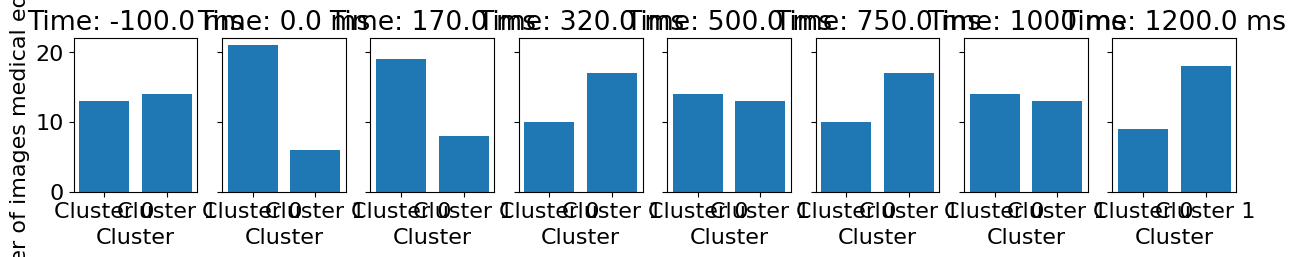

8it [00:00, 35.23it/s] [00:10<00:05,  1.72it/s]


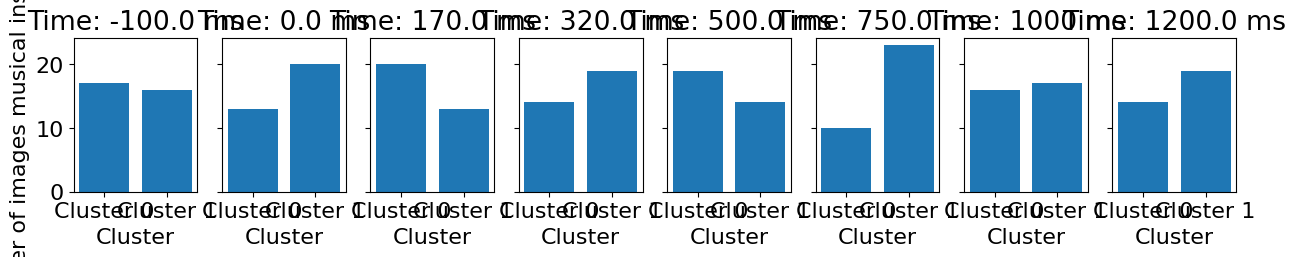

8it [00:00, 51.17it/s] [00:11<00:05,  1.80it/s]


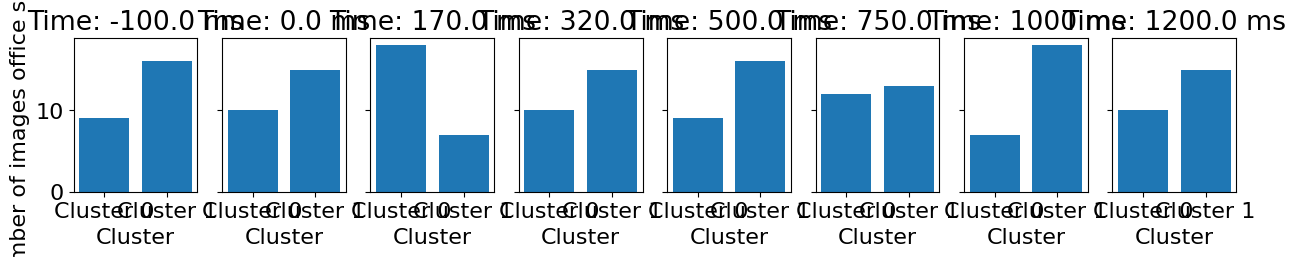

8it [00:00, 51.01it/s] [00:11<00:04,  1.92it/s]


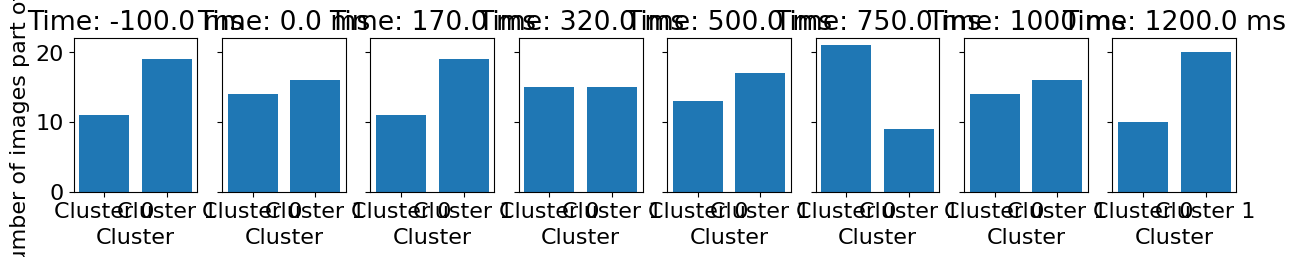

8it [00:00, 40.03it/s] [00:11<00:03,  1.95it/s]


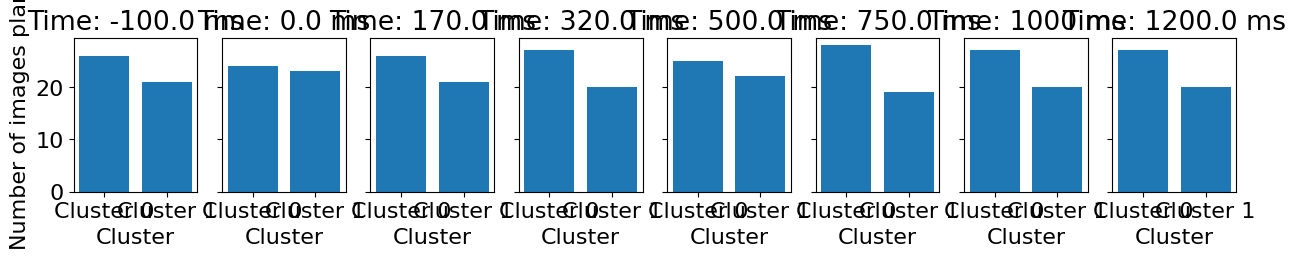

8it [00:00, 56.50it/s] [00:12<00:03,  1.77it/s]


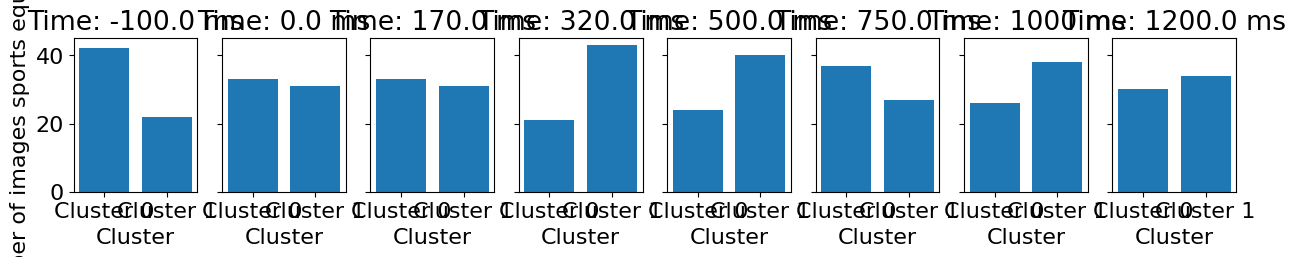

8it [00:00, 58.17it/s] [00:13<00:02,  1.89it/s]


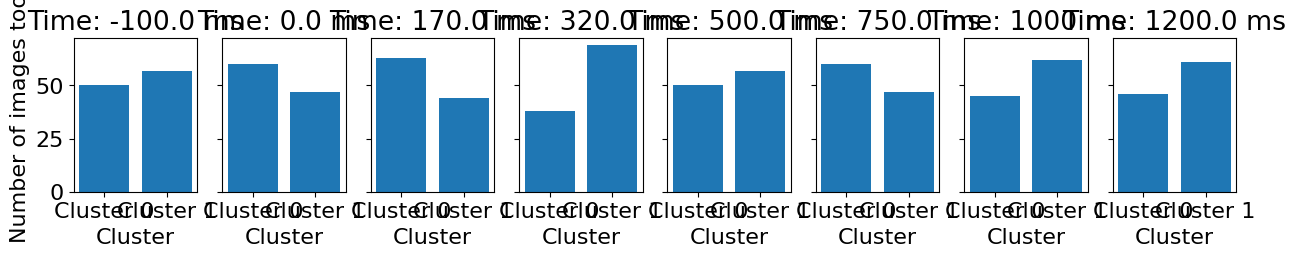

8it [00:00, 51.82it/s] [00:13<00:01,  2.00it/s]


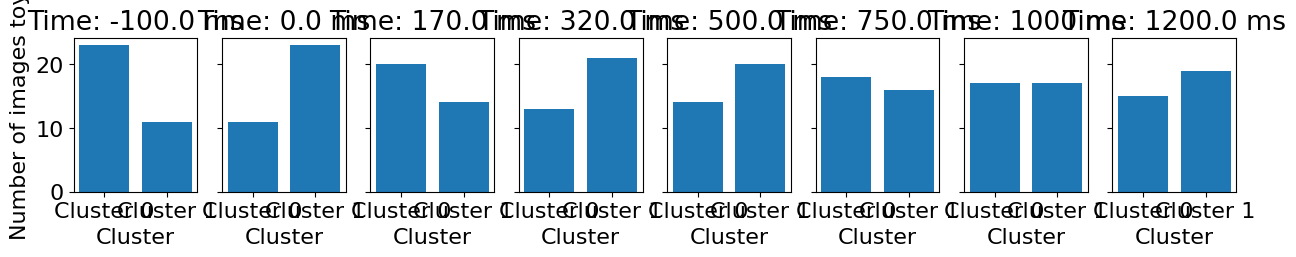

8it [00:00, 51.14it/s] [00:14<00:01,  1.98it/s]


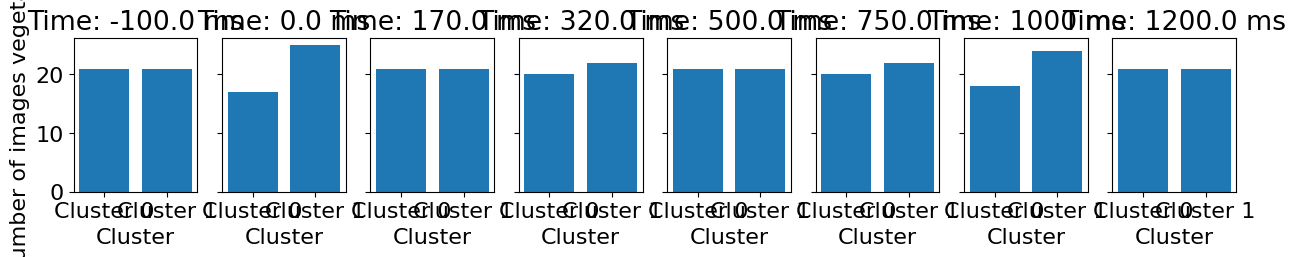

8it [00:00, 29.39it/s] [00:14<00:01,  1.99it/s]


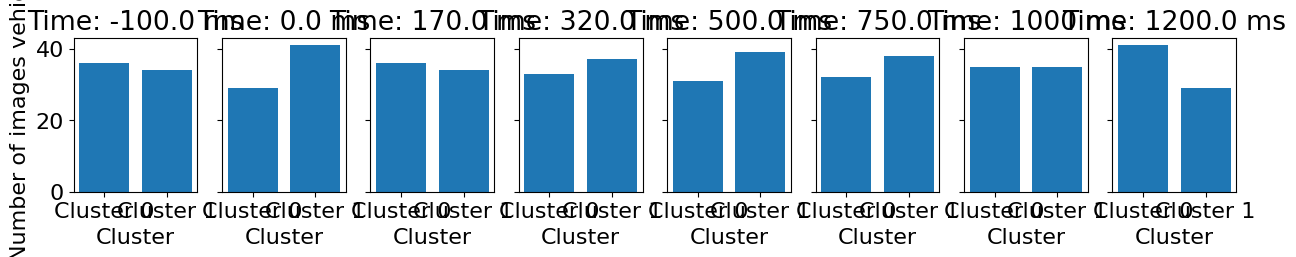

8it [00:00, 51.88it/s] [00:15<00:00,  1.71it/s]


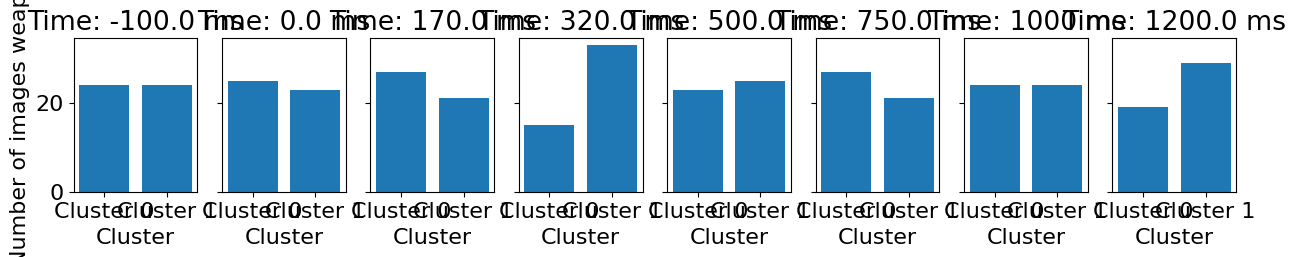

100%|██████████| 27/27 [00:15<00:00,  1.71it/s]


In [17]:
from tqdm import tqdm
category27 = pd.read_csv('category27_manual.tsv', sep='\t')
for category_name in tqdm(category27.columns):
    times = [-0.1,0.0, 0.170, 0.320, 0.5, 0.75, 1, 1.2]
    # category_name = 'animal'
    f, axes = plt.subplots(1, len(times), sharex=True, sharey = True, figsize=(15, 2))   

    for i,t in tqdm(enumerate(times)):
        index = epochs.times == t
        data = average_concept_epochs[:, index, :].squeeze() 
        # print(data.shape)
        kmeans = KMeans(n_clusters=2, random_state= 42).fit(data)
        labels = kmeans.labels_
        # Get cluster centers
        centers = kmeans.cluster_centers_  # Shape: (2, 39)
        index_0 = np.where(labels == 0)[0]
        index_1 = np.where(labels == 1)[0]
        names_0 = []
        names_1 = []

        category = np.where(category27[category_name] == 1)[0]
        category_0 = len(np.intersect1d(category, index_0))
        category_1 = len(np.intersect1d(category, index_1))
        # print(f"division of category: {category_0} vs {category_1}") 
        # plot these divisions are bar plot
        axes[i].bar(['Cluster 0', 'Cluster 1'], [category_0, category_1])
        axes[i].set_title(f"Time: {t*1000} ms") 
        axes[0].set_ylabel(f'Number of images {category_name}')
        axes[i].set_xlabel('Cluster')
    plt.show()

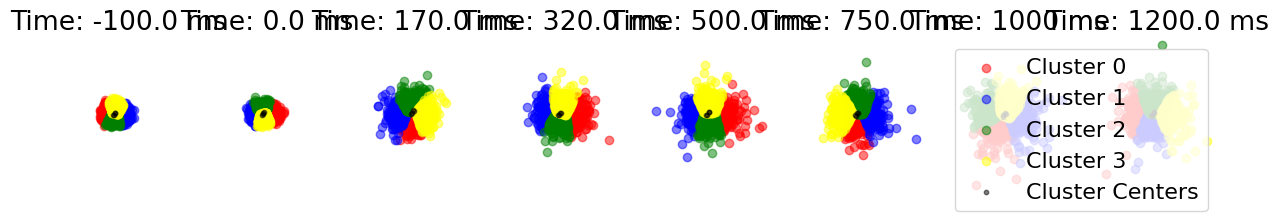

In [18]:
times = [-0.1,0.0, 0.170, 0.320, 0.5, 0.75, 1, 1.2]
f, axes = plt.subplots(1, len(times), sharex=True, sharey = True, figsize=(15, 2))   
for i,t in enumerate(times):
    index = epochs.times == t
    data = average_concept_epochs[:, index, :].squeeze() 
    # print(data.shape)
    kmeans = KMeans(n_clusters=4).fit(data)
    labels = kmeans.labels_
    # Get cluster centers
    centers = kmeans.cluster_centers_
    
    index_0 = np.where(labels == 0)[0]
    index_1 = np.where(labels == 1)[0]
    index_2 = np.where(labels == 2)[0]
    index_3 = np.where(labels == 3)[0]

    pca = PCA(n_components=2, random_state= 42)
    data_2d = pca.fit_transform(data)
    axes[i].scatter(data_2d[index_0, 0], data_2d[index_0, 1], c='red', label='Cluster 0', alpha=0.5)
    axes[i].scatter(data_2d[index_1, 0], data_2d[index_1, 1], c='blue', label='Cluster 1', alpha=0.5)  
    axes[i].scatter(data_2d[index_2, 0], data_2d[index_2, 1], c='green', label='Cluster 2', alpha=0.5)
    axes[i].scatter(data_2d[index_3, 0], data_2d[index_3, 1], c='yellow', label='Cluster 3', alpha=0.5)
    axes[i].scatter(centers[:, 0], centers[:, 1], c='black', s=10, alpha=0.5, label='Cluster Centers')
    axes[i].set_title(f"Time: {t*1000} ms")
    axes[i].axis('off')
plt.legend()        
plt.show()

0it [00:00, ?it/s]

8it [00:00, 24.26it/s]


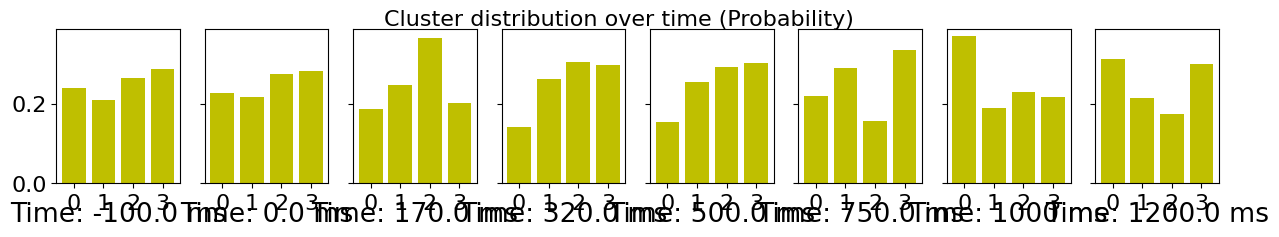

In [19]:
category27 = pd.read_csv('category27_manual.tsv', sep='\t')
times = [-0.1,0.0, 0.170, 0.320, 0.5, 0.75, 1, 1.2]
indices = {}
probabilites = {}
f, axes = plt.subplots(1, len(times), sharex=True, sharey = True, figsize=(15, 2))  
# plt.title('Cluster distribution over time') as the main title
plt.suptitle('Cluster distribution over time (Probability)', fontsize=16)
for i, t in tqdm(enumerate(times)):
    index = epochs.times == t
    data = average_concept_epochs[:, index, :].squeeze() 
    # print(data.shape)
    kmeans = KMeans(n_clusters=4, random_state=42).fit(data)
    labels = kmeans.labels_
    # # Get cluster centers
    centers = kmeans.cluster_centers_
    index_0 = np.where(labels == 0)[0]
    index_1 = np.where(labels == 1)[0]
    index_2 = np.where(labels == 2)[0]
    index_3 = np.where(labels == 3)[0]
    indices[t] = [index_0, index_1, index_2, index_3]
    probabilites[t] = np.array([len(index_0), len(index_1), len(index_2), len(index_3)])/sum([len(index_0), len(index_1), len(index_2), len(index_3)])
    axes[i].bar(['0', '1', '2', '3'], probabilites[t], color = 'y')
    axes[i].set_title(f"Time: {t*1000} ms", y = -0.3)   
plt.show()


8it [00:00, 261.99it/s]00:00<?, ?it/s]


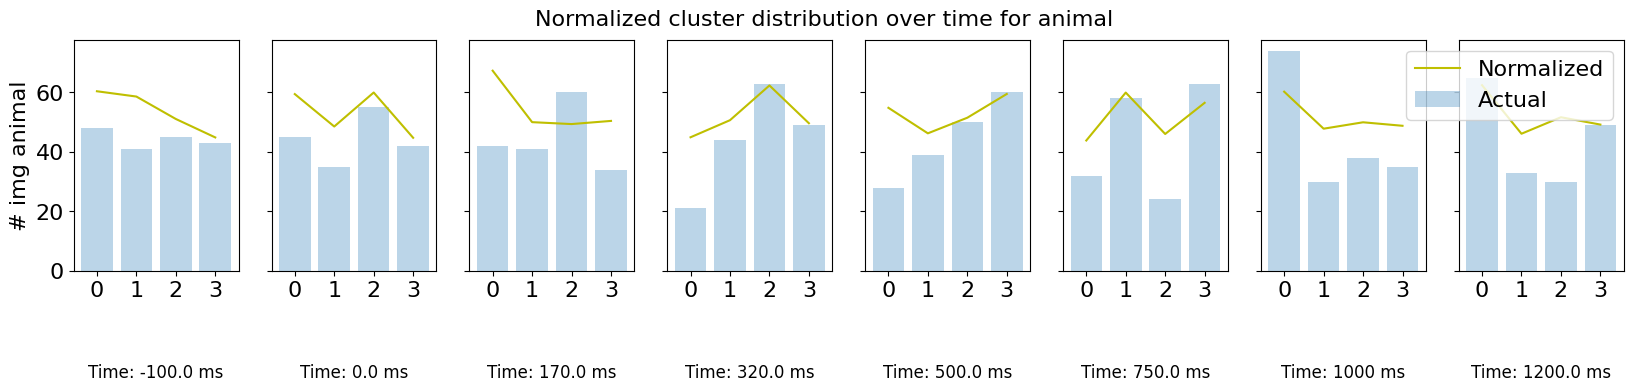

8it [00:00, 270.12it/s]00:00<00:11,  2.30it/s]


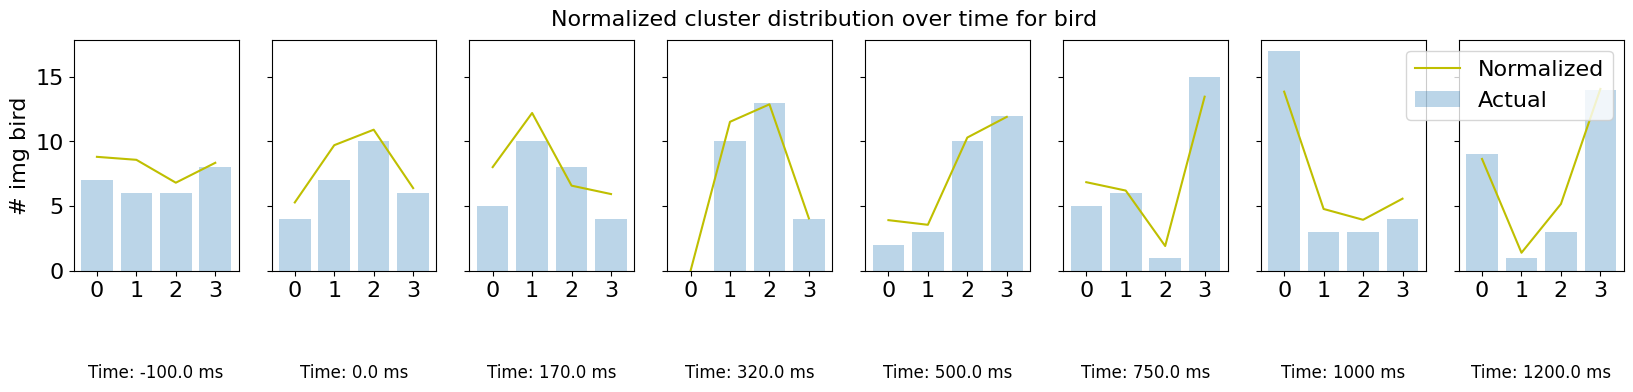

8it [00:00, 265.83it/s]00:00<00:10,  2.38it/s]


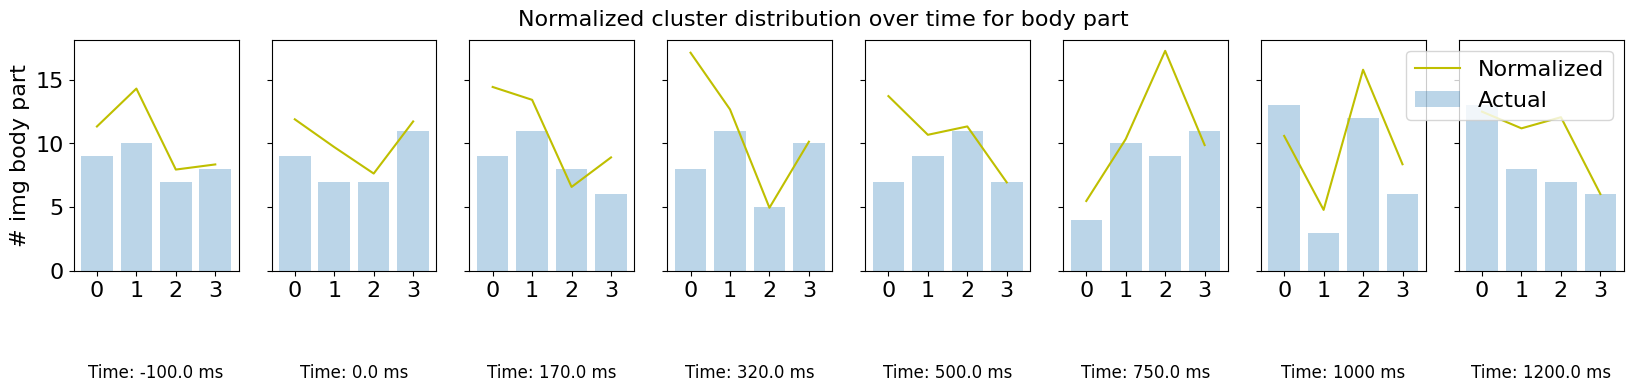

8it [00:00, 216.43it/s]00:01<00:12,  1.97it/s]


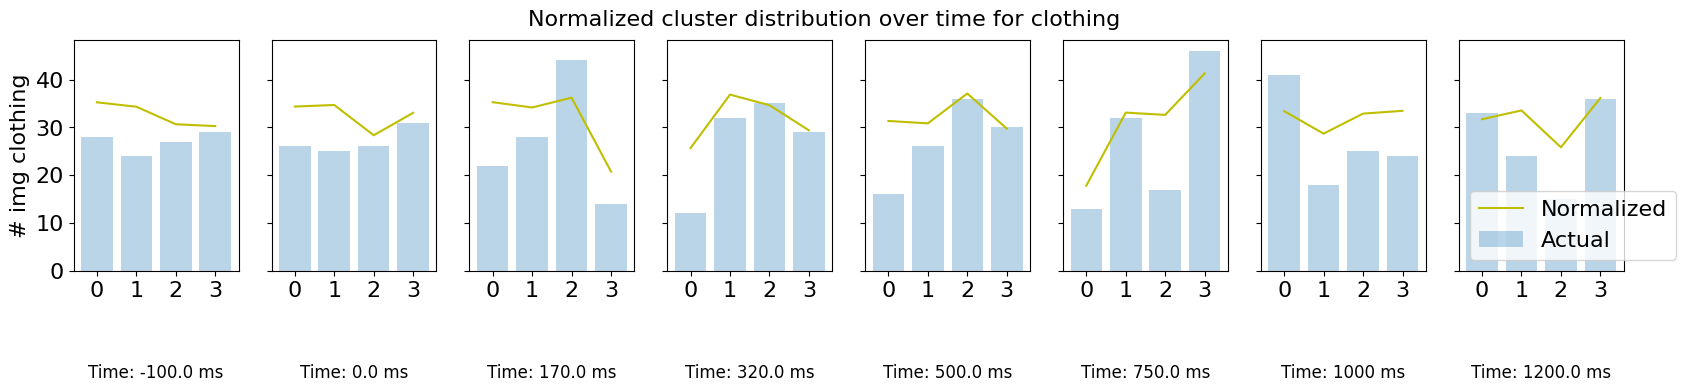

8it [00:00, 269.54it/s]00:01<00:11,  2.03it/s]


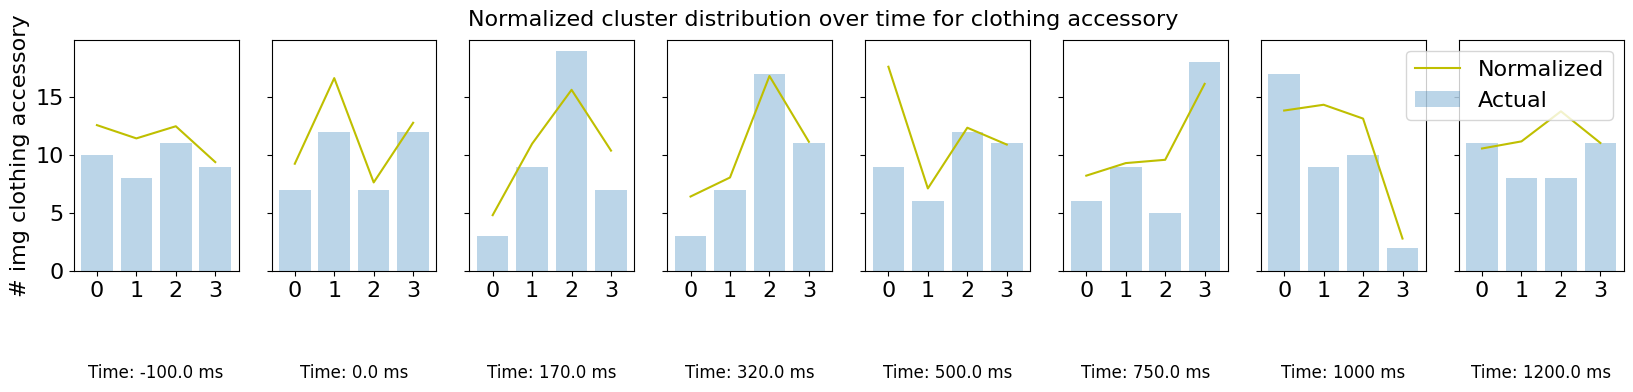

8it [00:00, 362.18it/s]00:02<00:09,  2.27it/s]


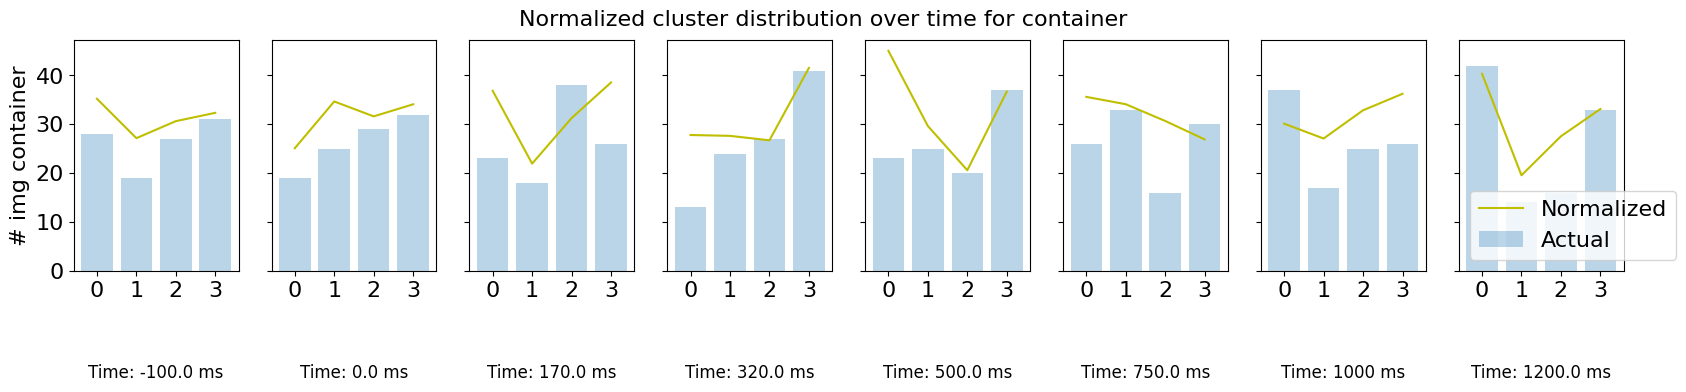

8it [00:00, 368.75it/s]00:02<00:08,  2.55it/s]


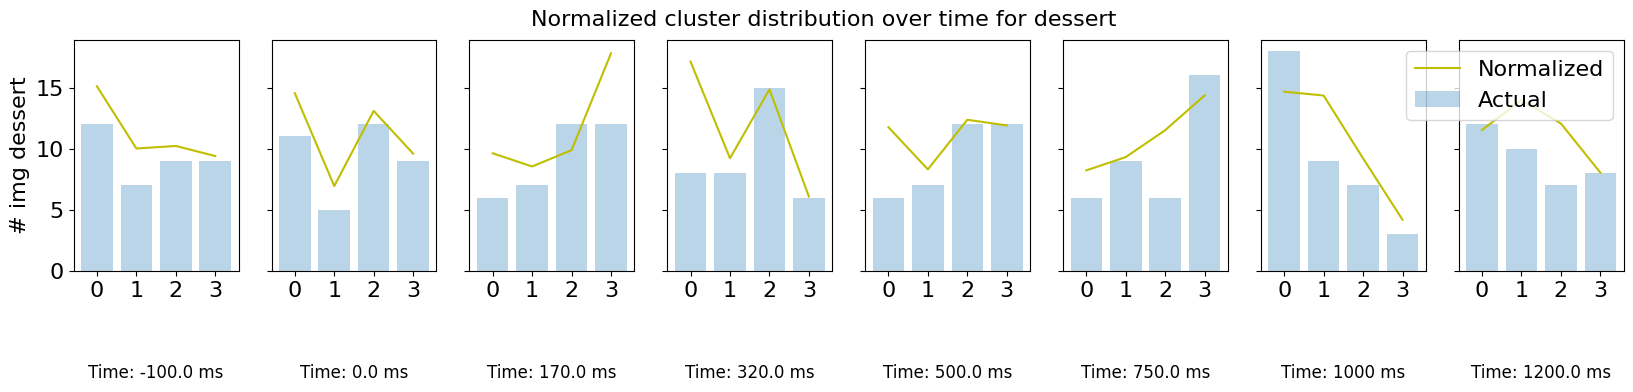

8it [00:00, 371.17it/s]00:02<00:07,  2.78it/s]


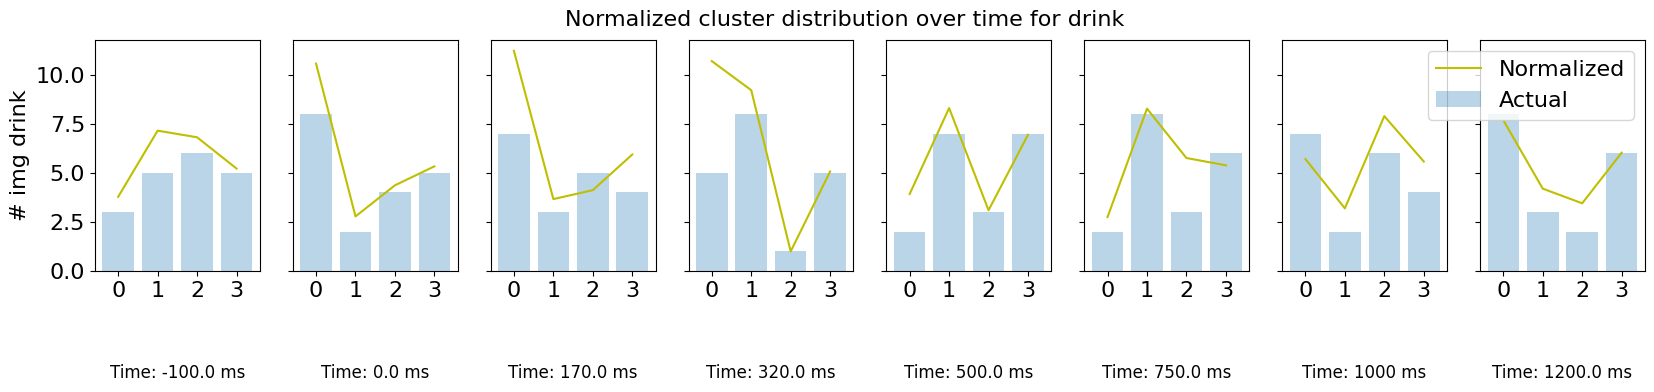

8it [00:00, 367.20it/s]00:03<00:06,  2.94it/s]


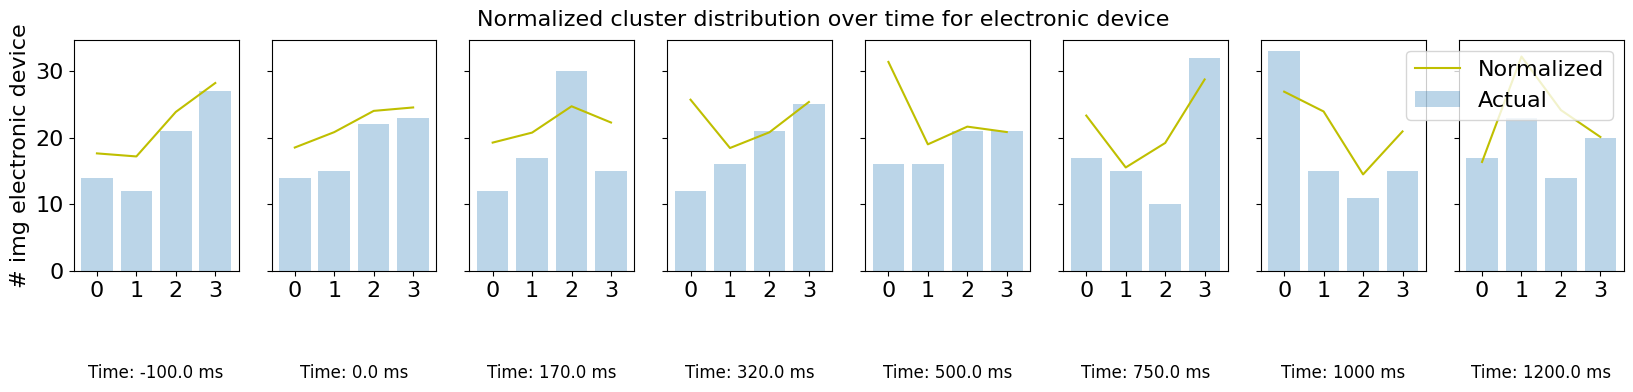

8it [00:00, 363.96it/s]00:03<00:06,  2.64it/s]


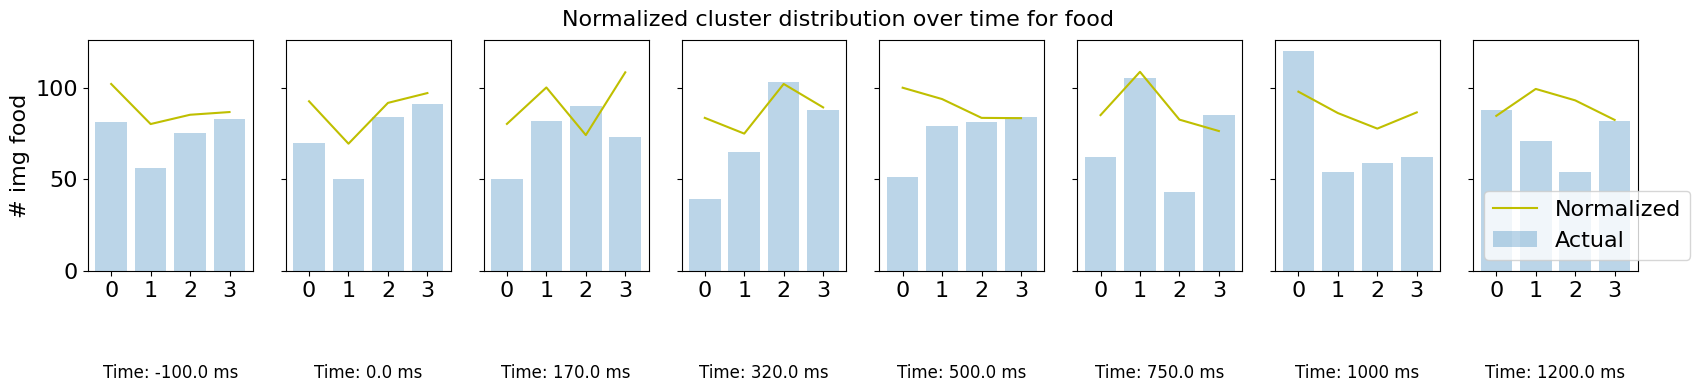

8it [00:00, 374.93it/s][00:03<00:05,  2.85it/s]


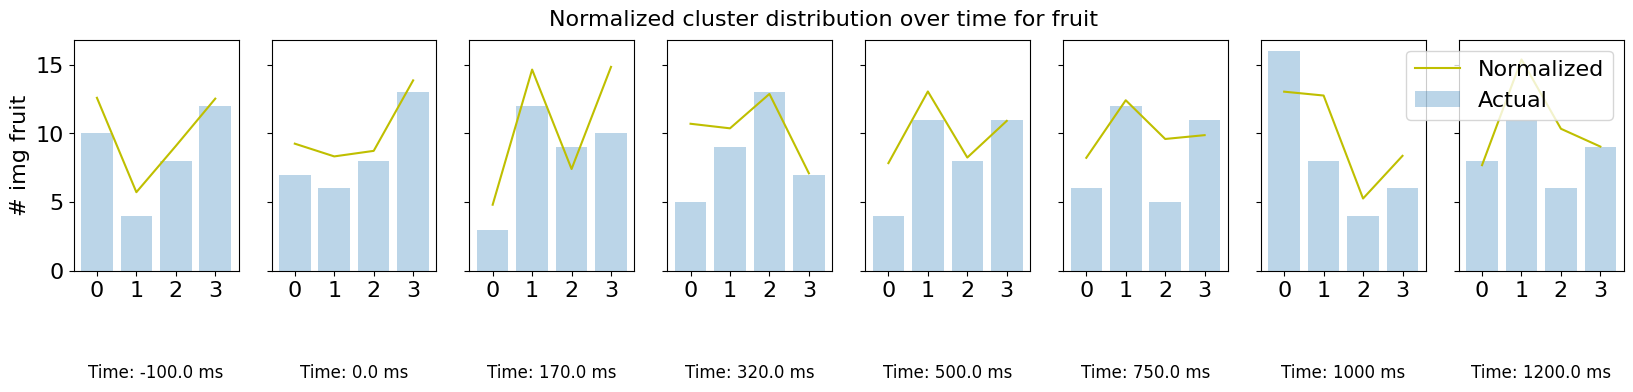

8it [00:00, 374.45it/s][00:04<00:05,  3.01it/s]


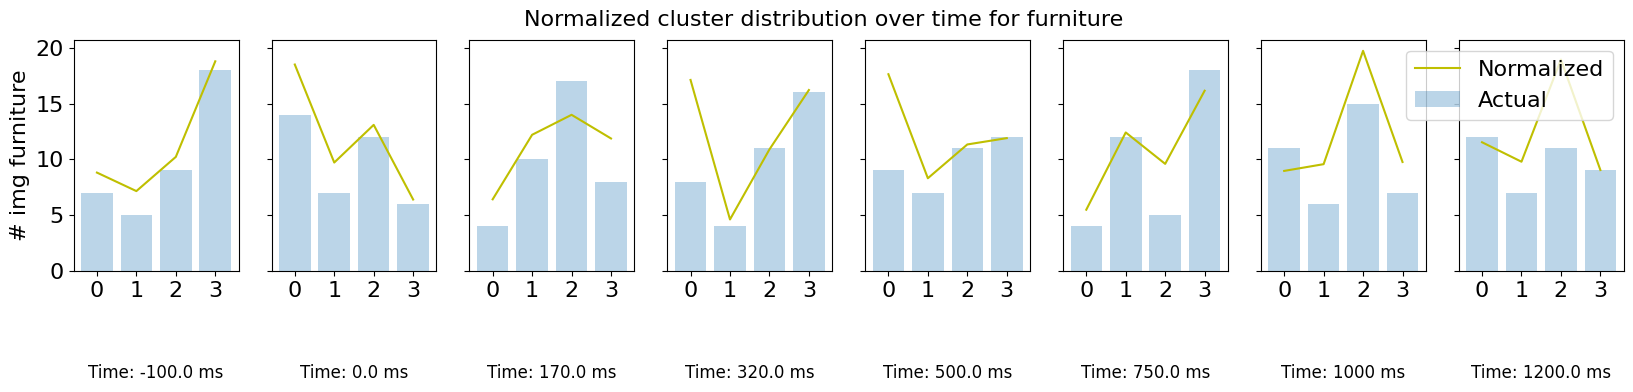

8it [00:00, 375.01it/s][00:04<00:04,  3.09it/s]


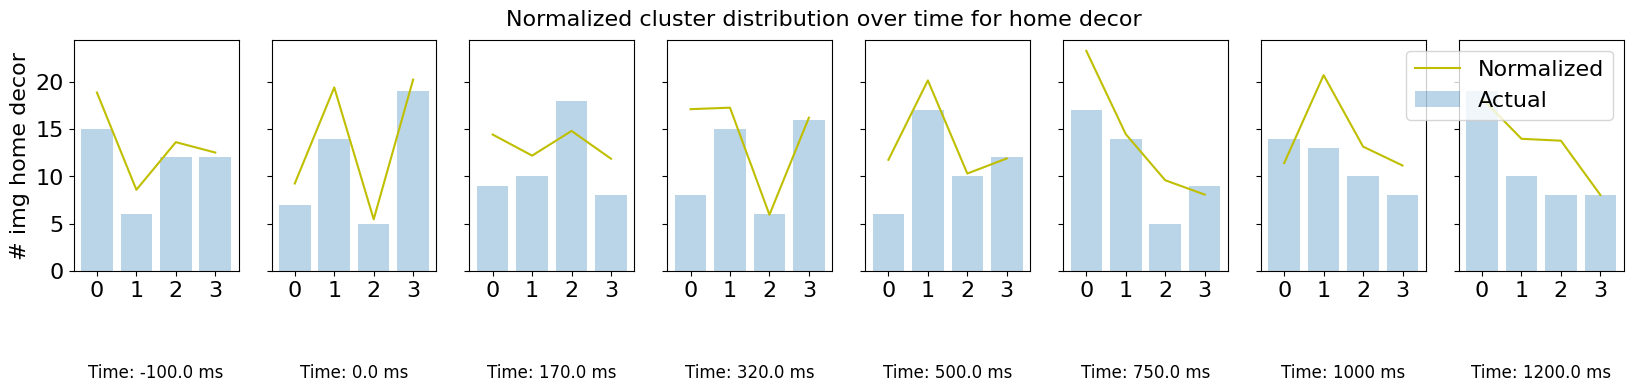

8it [00:00, 382.64it/s][00:04<00:04,  3.16it/s]


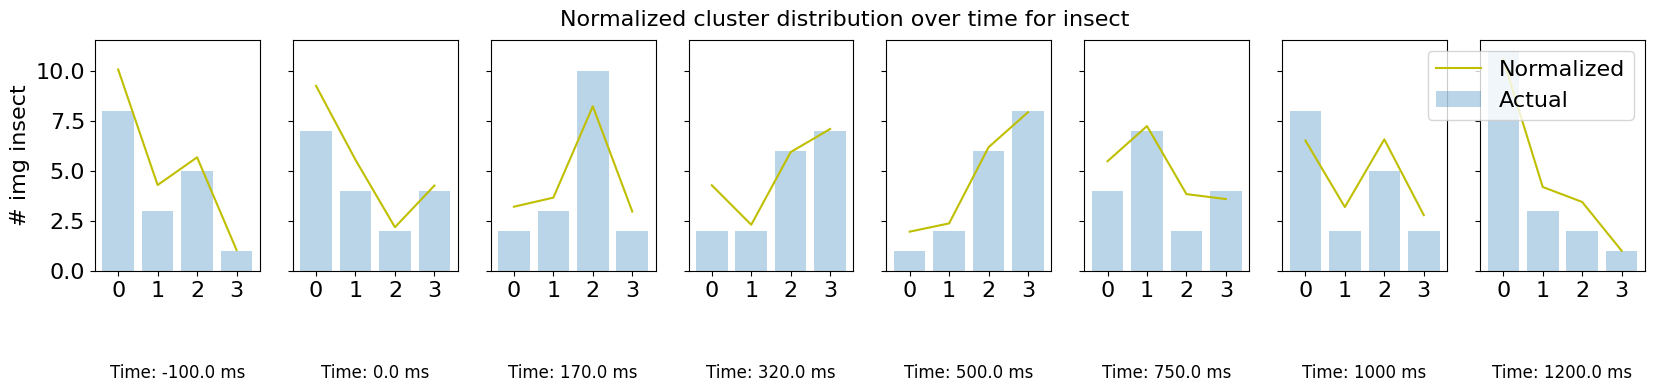

8it [00:00, 379.79it/s][00:05<00:04,  3.20it/s]


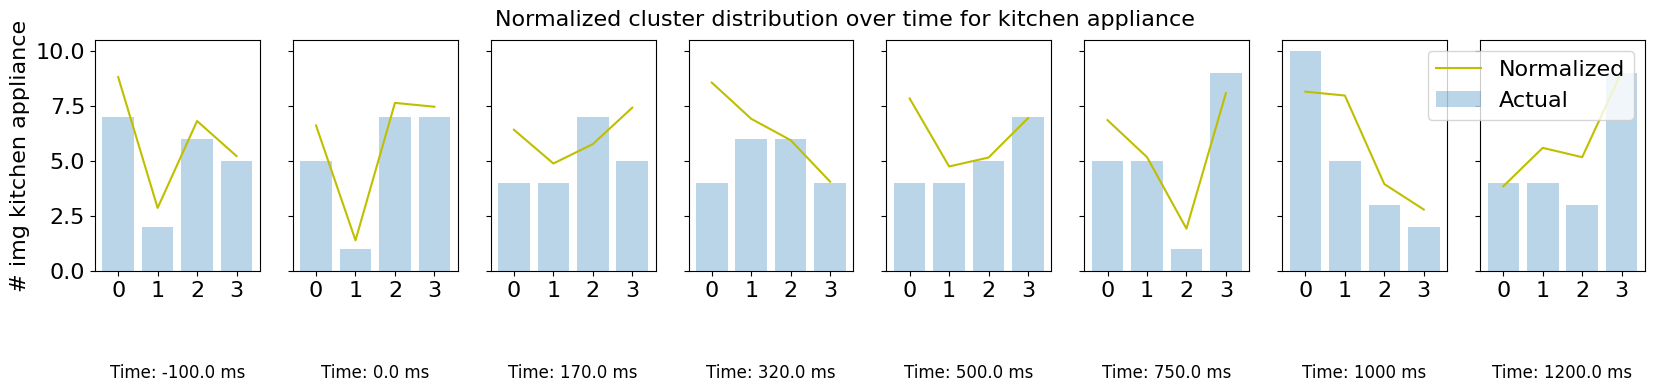

8it [00:00, 380.22it/s][00:05<00:04,  2.79it/s]


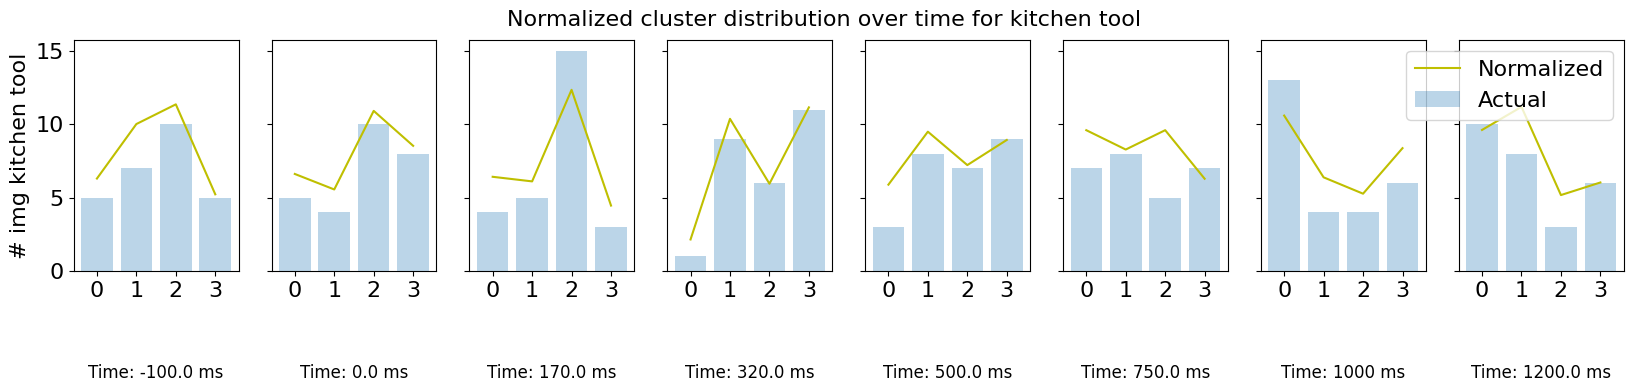

8it [00:00, 378.17it/s][00:05<00:03,  2.95it/s]


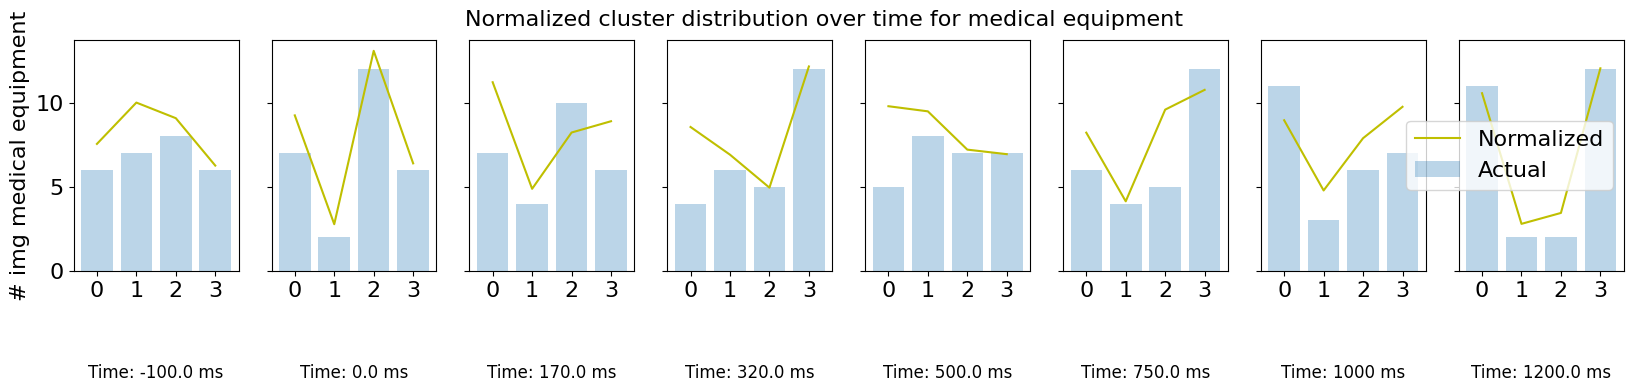

8it [00:00, 370.24it/s][00:06<00:03,  3.09it/s]


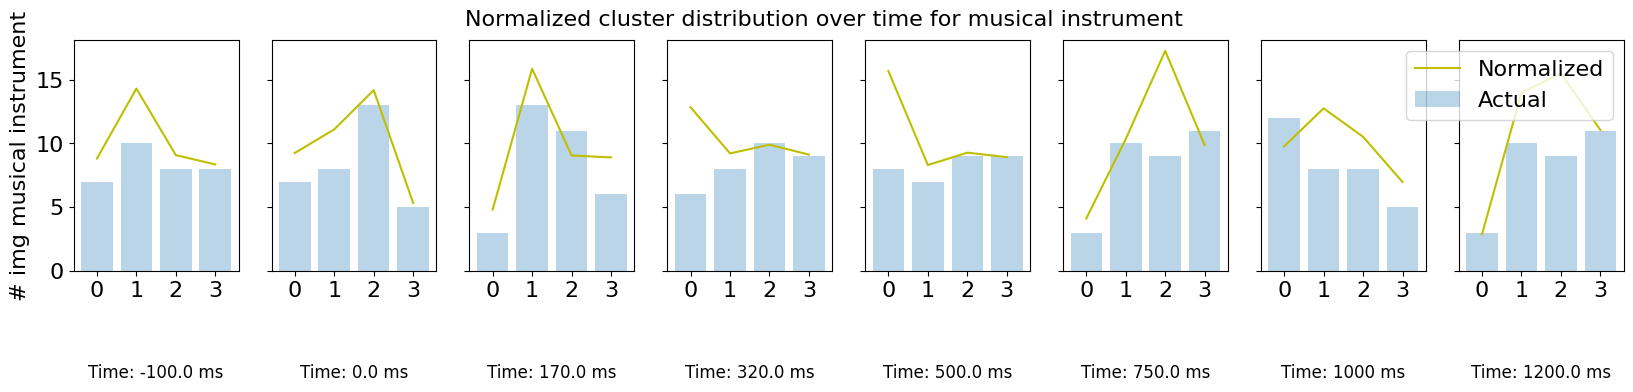

8it [00:00, 321.75it/s][00:06<00:02,  3.17it/s]


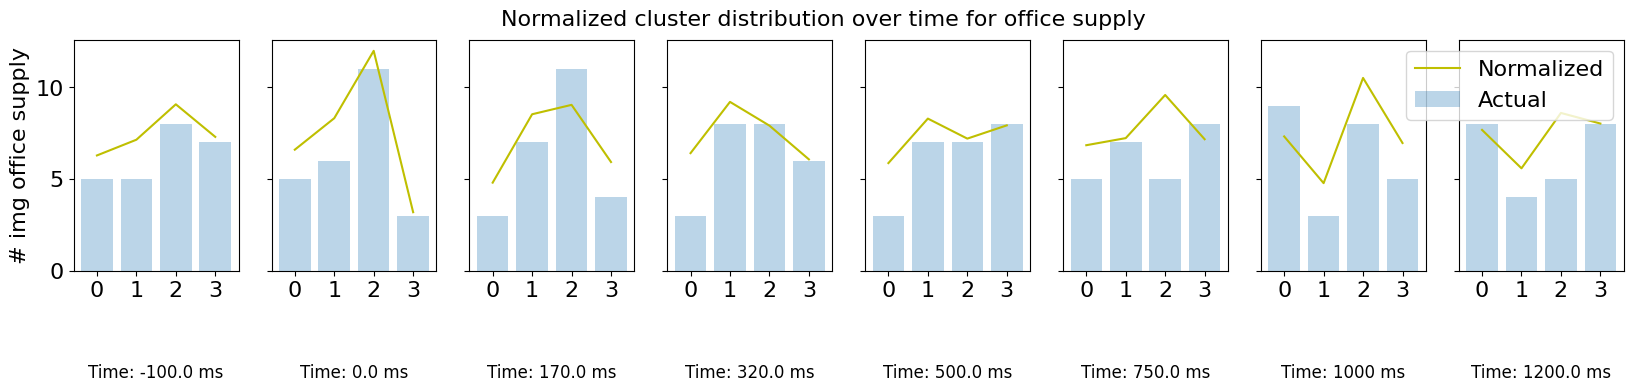

8it [00:00, 380.98it/s][00:06<00:02,  3.25it/s]


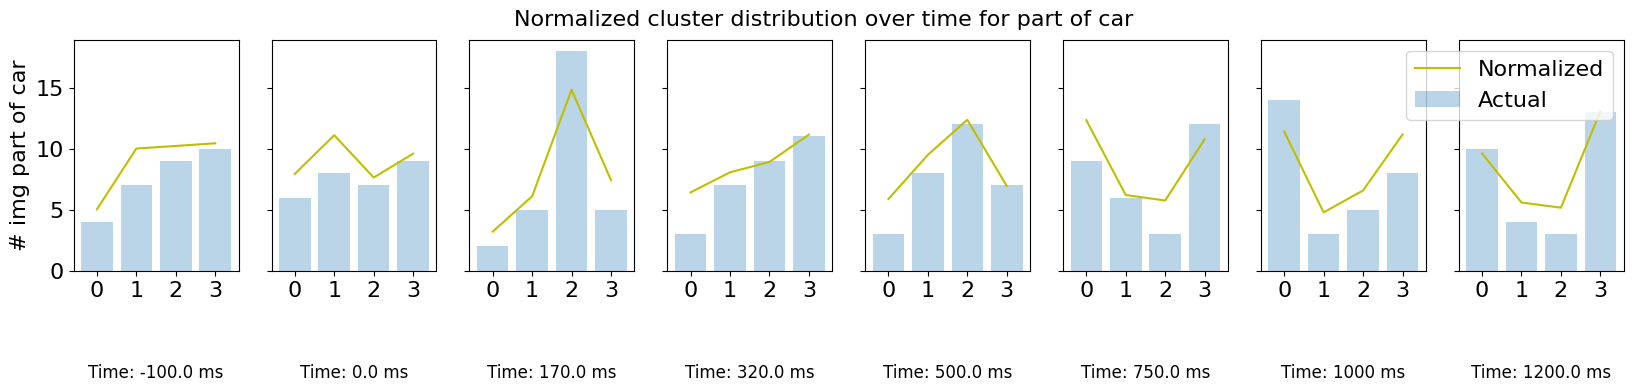

8it [00:00, 384.38it/s][00:07<00:02,  3.30it/s]


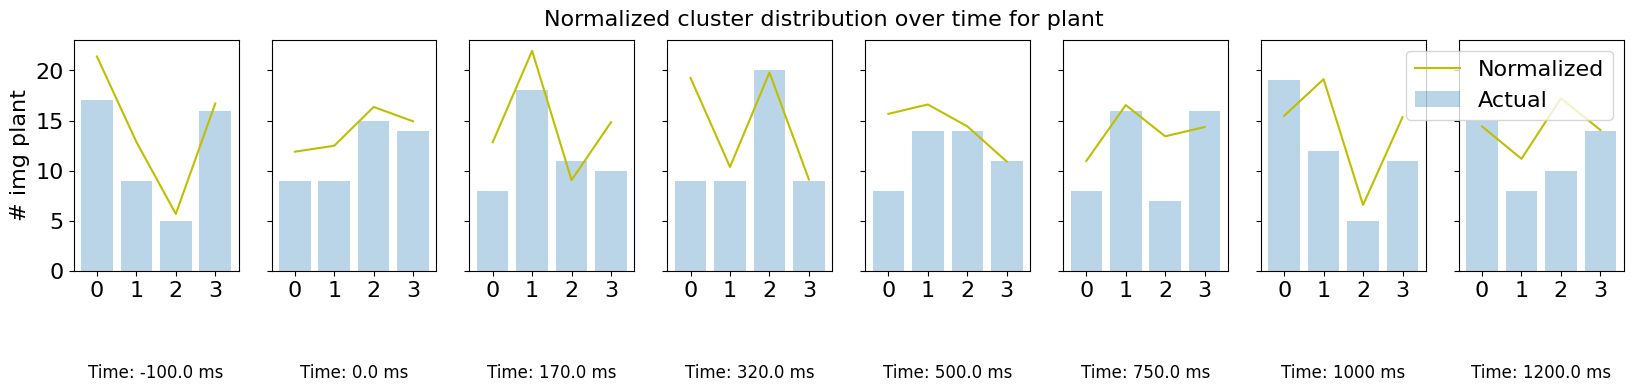

8it [00:00, 371.79it/s][00:07<00:02,  2.81it/s]


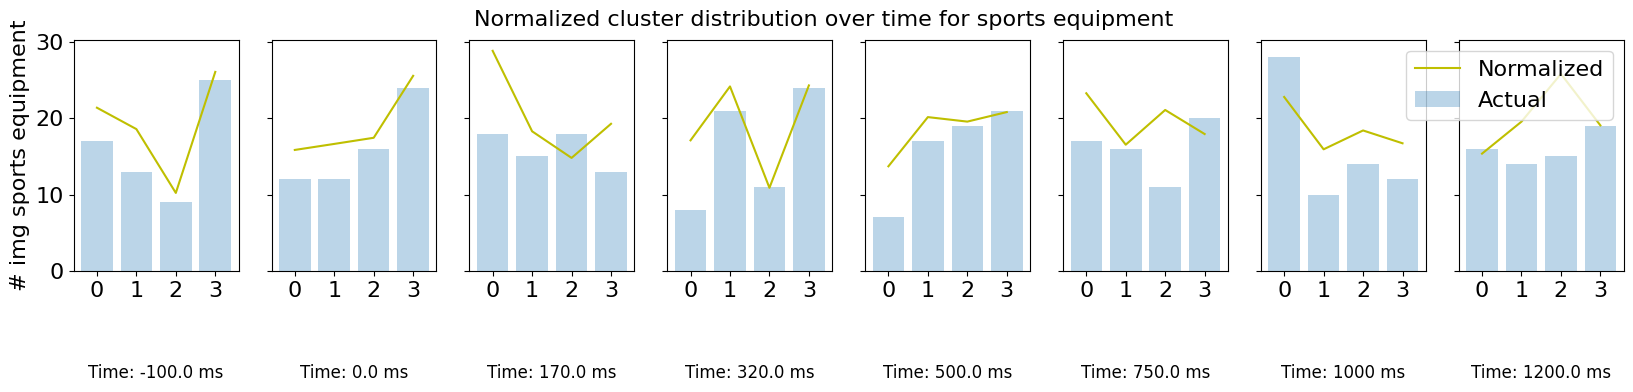

8it [00:00, 380.79it/s][00:07<00:01,  2.97it/s]


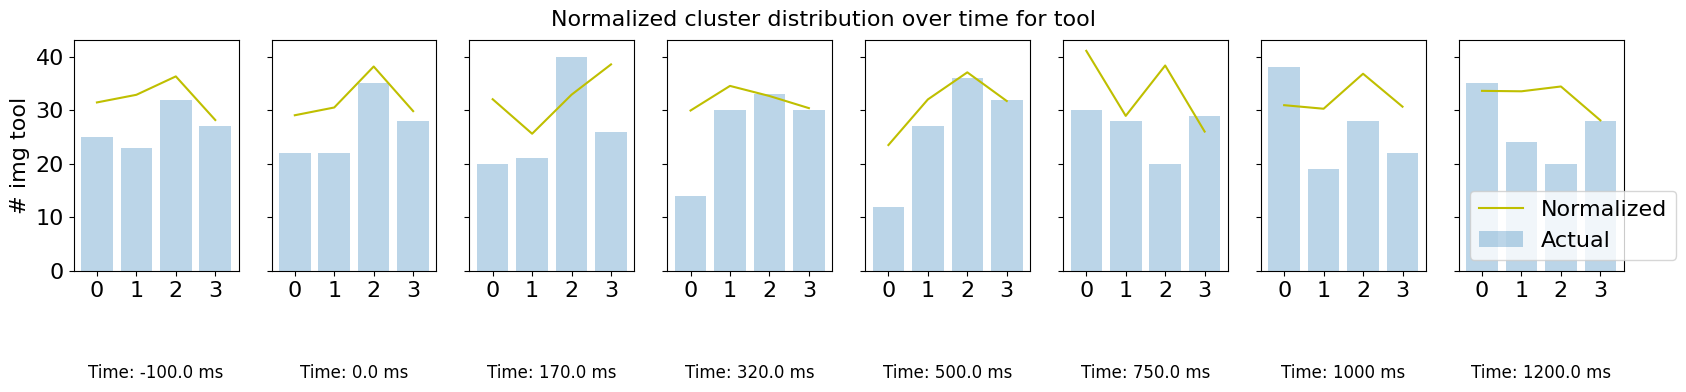

8it [00:00, 381.18it/s][00:08<00:01,  3.08it/s]


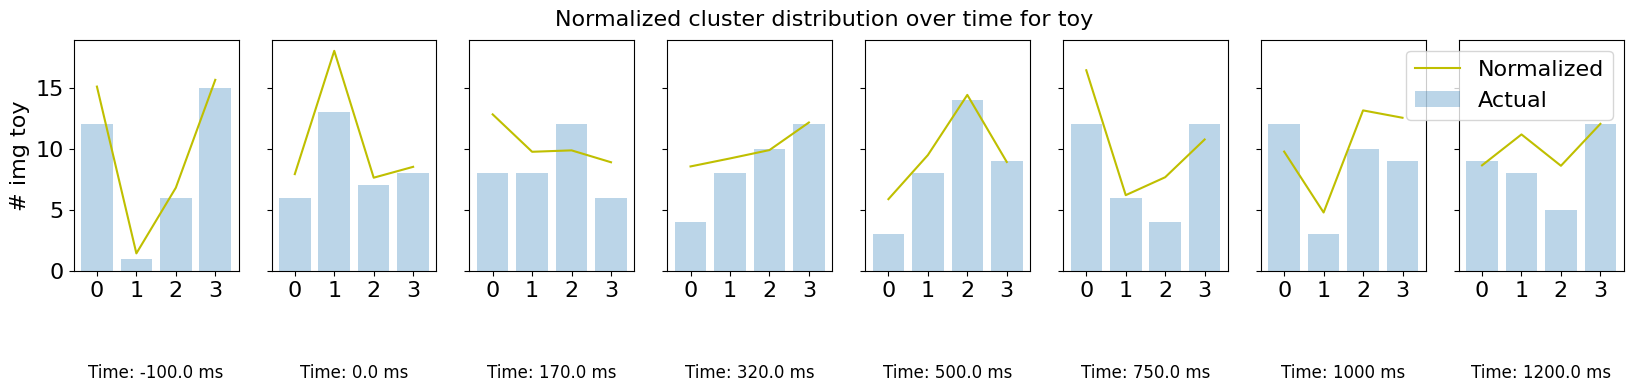

8it [00:00, 368.56it/s][00:08<00:00,  3.19it/s]


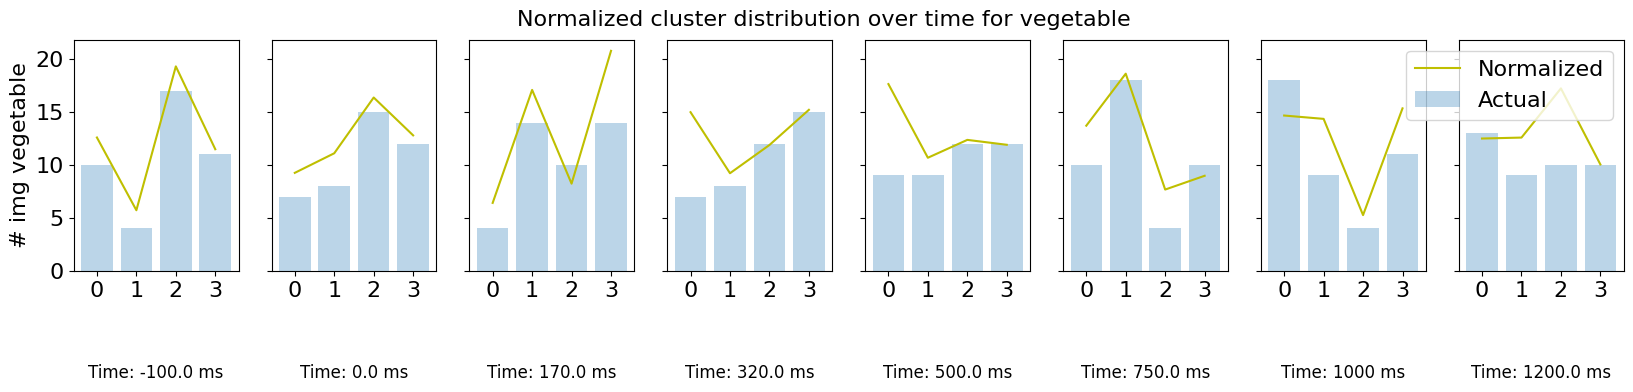

8it [00:00, 366.98it/s][00:08<00:00,  3.23it/s]


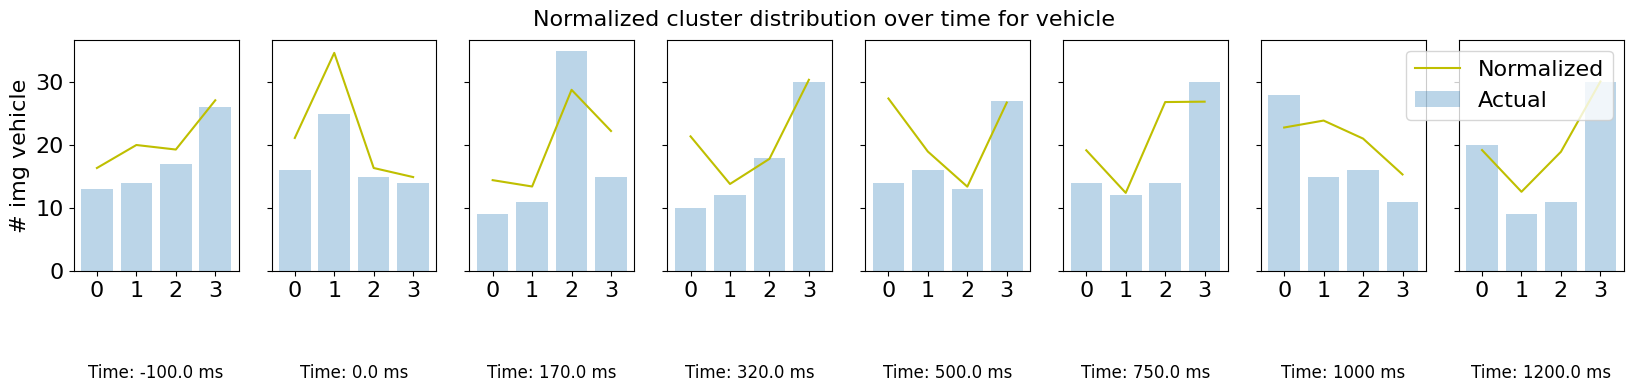

8it [00:00, 43.25it/s] [00:08<00:00,  3.29it/s]


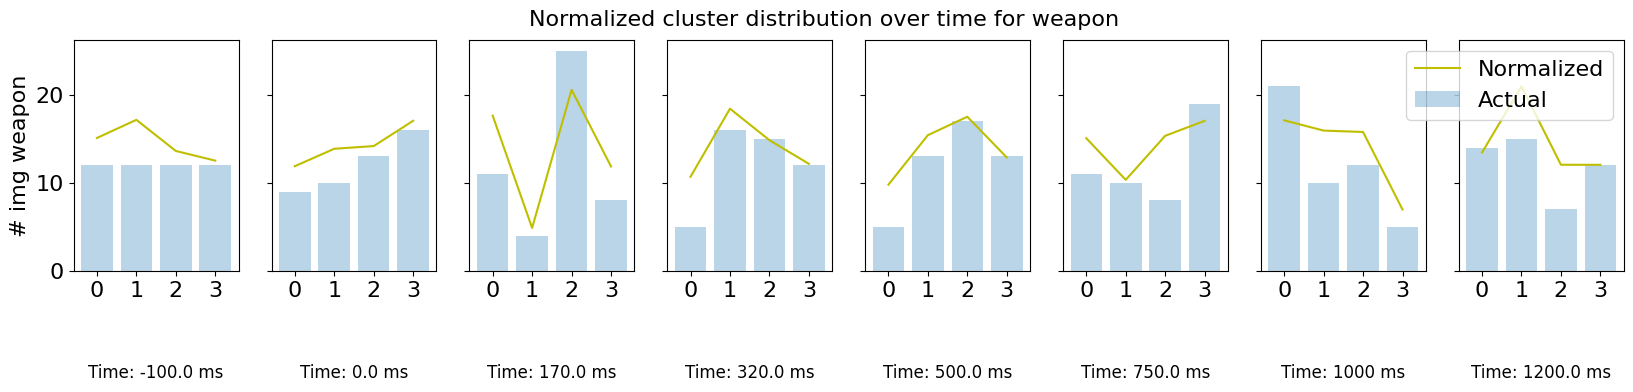

100%|██████████| 27/27 [00:09<00:00,  2.86it/s]


In [29]:

for category_name in tqdm(category27.columns):
    f, axes = plt.subplots(1, len(times), sharex=True, sharey = True, figsize=(20, 3))   
    plt.suptitle(f'Normalized cluster distribution over time for {category_name}', fontsize=16)
    for i,t in tqdm(enumerate(times)):
        index_0, index_1, index_2, index_3 = indices[t]
        category = np.where(category27[category_name] == 1)[0]
        category_0 = len(np.intersect1d(category, index_0))
        category_1 = len(np.intersect1d(category, index_1))
        category_2 = len(np.intersect1d(category, index_2))
        category_3 = len(np.intersect1d(category, index_3))
        # normalize wrt probabilites 
        norm_factor = 0.3
        prob_0 = category_0 / probabilites[t][0]*norm_factor
        prob_1 = category_1 / probabilites[t][1]*norm_factor
        prob_2 = category_2 / probabilites[t][2]*norm_factor
        prob_3 = category_3 / probabilites[t][3]*norm_factor


        # if category_0 + category_1 + category_2 + category_3 >=150:
        # plot these divisions are bar plot
        axes[i].bar(['0', '1', '2', '3'], [category_0, category_1, category_2, category_3], alpha = 0.3, label = 'Actual')    
        axes[i].plot(['0', '1', '2', '3'], [prob_0, prob_1, prob_2, prob_3], color = 'y', alpha = 1, label= 'Normalized')    
        axes[i].set_title(f"Time: {t*1000} ms", y = -0.5, fontsize=12)   
        axes[0].set_ylabel(f'# img {category_name}') 
    plt.legend()            
    plt.show()  



8it [00:00, 46.19it/s][00:00<?, ?it/s]


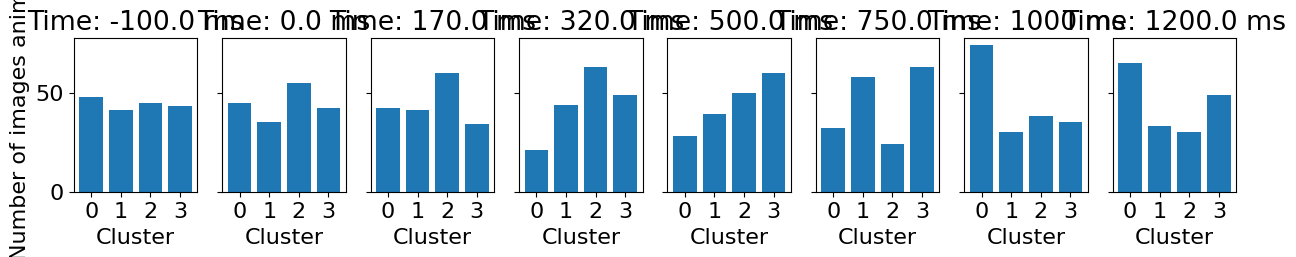

8it [00:00, 46.76it/s][00:00<00:14,  1.85it/s]


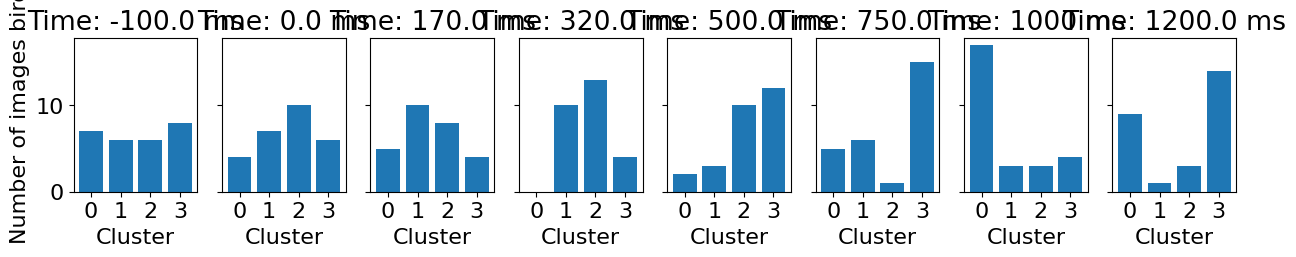

8it [00:00, 49.86it/s][00:01<00:13,  1.82it/s]


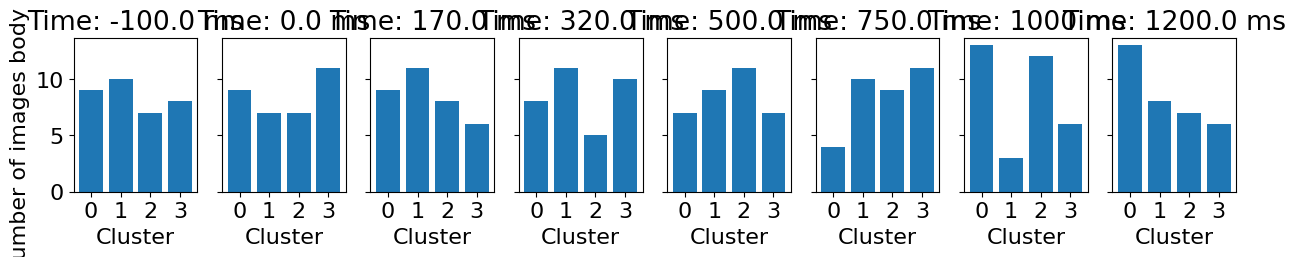

8it [00:00, 52.21it/s][00:01<00:13,  1.74it/s]


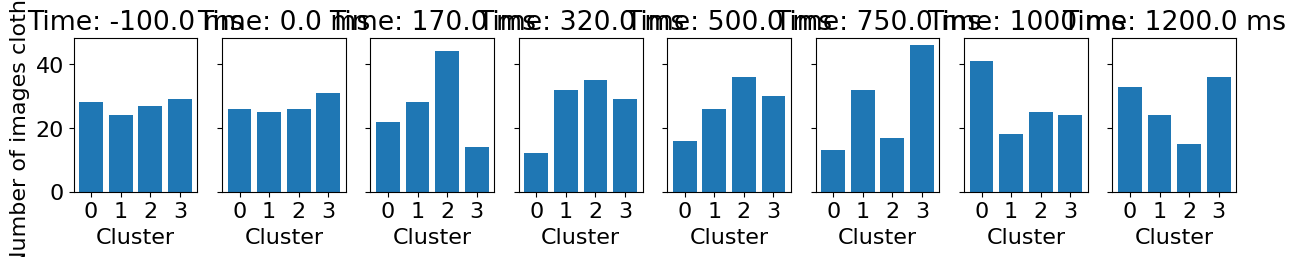

8it [00:00, 48.59it/s][00:02<00:12,  1.90it/s]


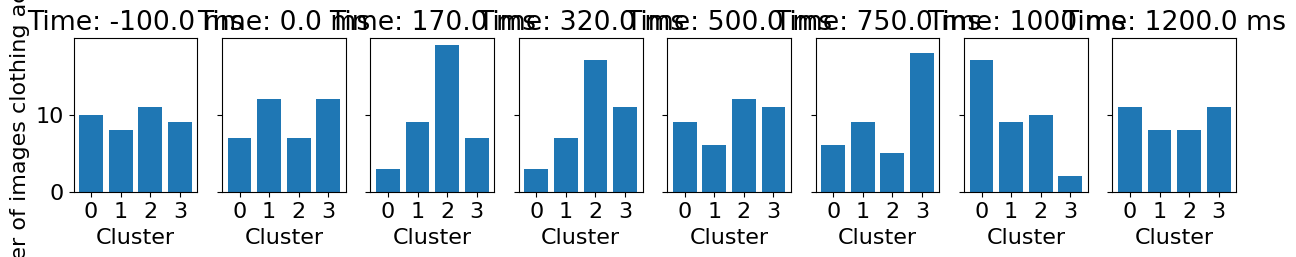

8it [00:00, 21.99it/s][00:02<00:11,  1.99it/s]


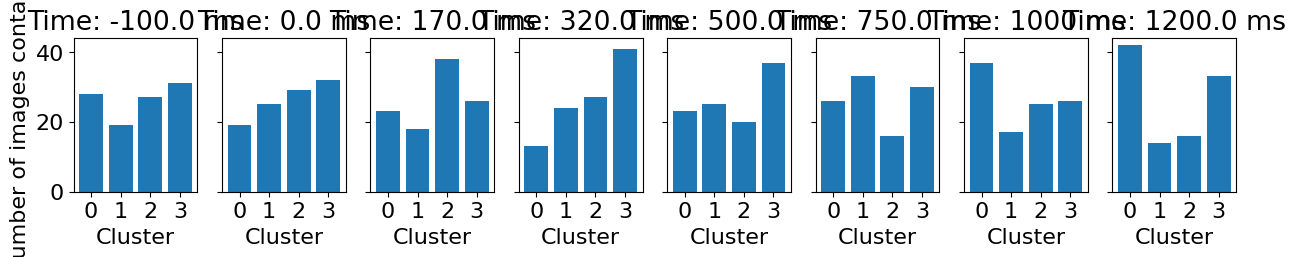

8it [00:00, 24.13it/s][00:03<00:11,  1.79it/s]


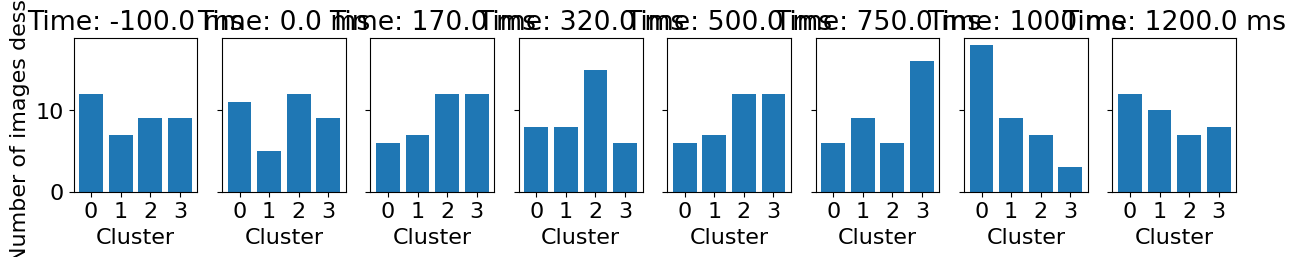

8it [00:00, 47.51it/s][00:03<00:12,  1.66it/s]


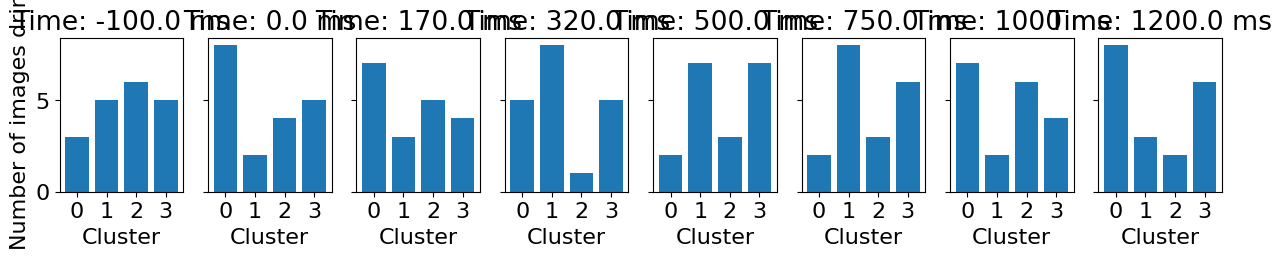

8it [00:00, 44.93it/s][00:04<00:10,  1.76it/s]


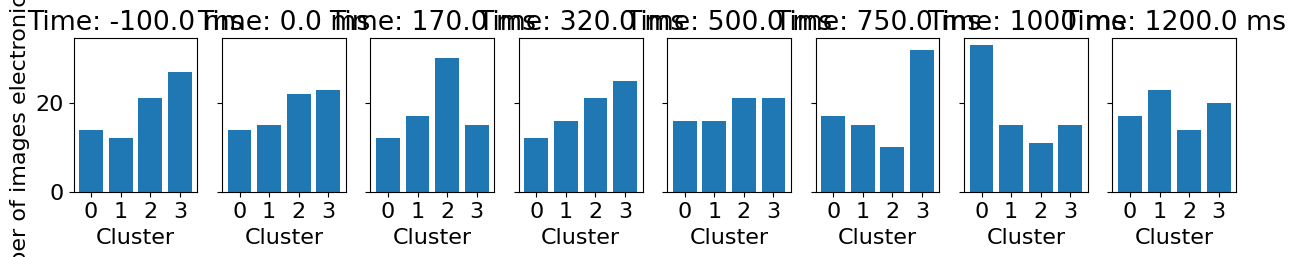

8it [00:00, 44.82it/s][00:04<00:09,  1.86it/s]


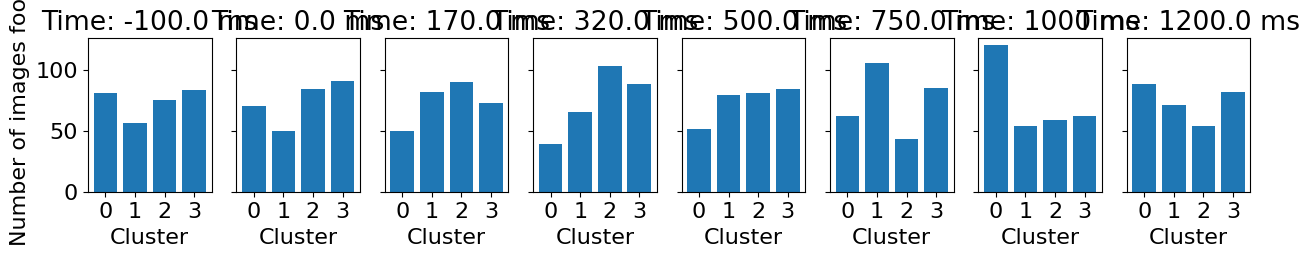

8it [00:00, 44.94it/s] [00:05<00:08,  1.93it/s]


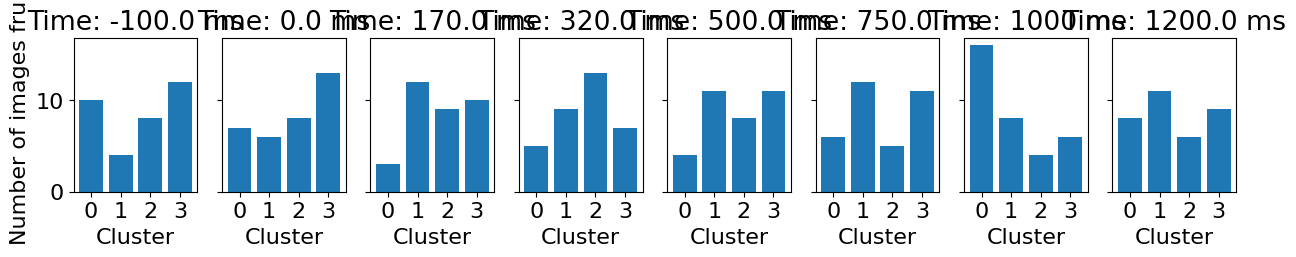

8it [00:00, 25.58it/s] [00:05<00:08,  1.90it/s]


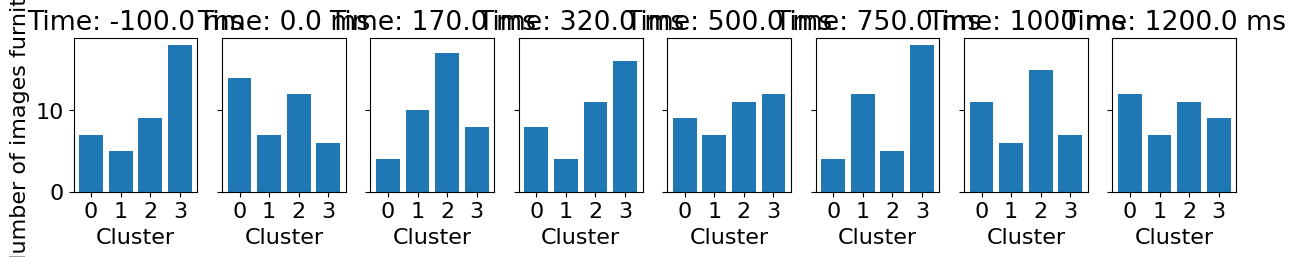

8it [00:00, 44.39it/s] [00:06<00:09,  1.62it/s]


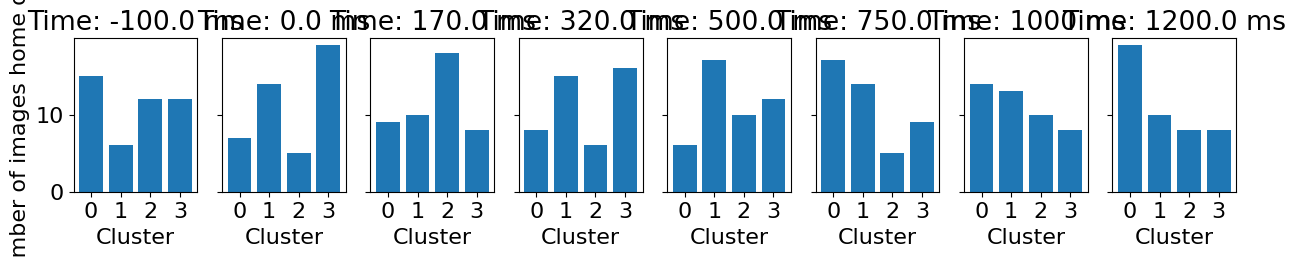

8it [00:00, 49.01it/s] [00:07<00:08,  1.66it/s]


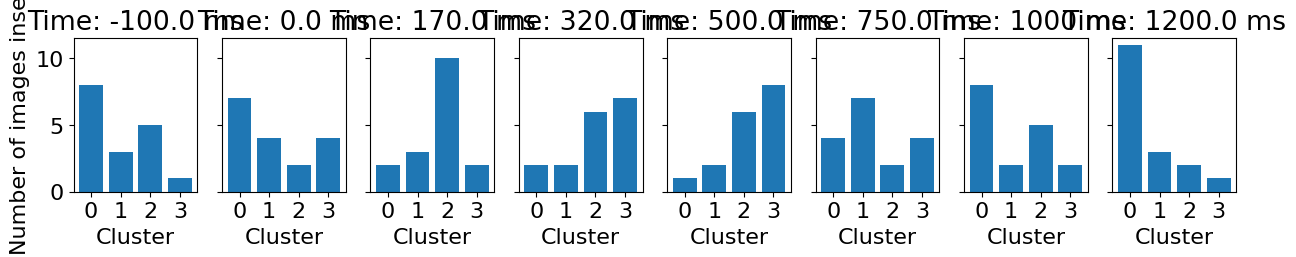

8it [00:00, 50.52it/s] [00:07<00:07,  1.69it/s]


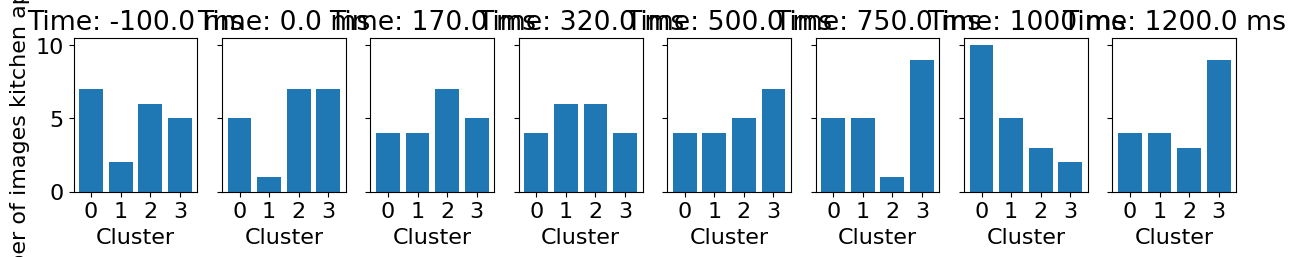

8it [00:00, 48.78it/s] [00:08<00:06,  1.72it/s]


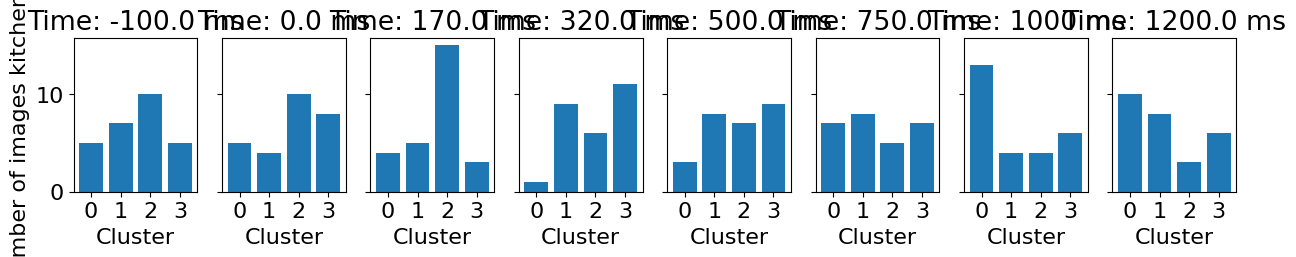

8it [00:00, 44.02it/s] [00:09<00:06,  1.63it/s]


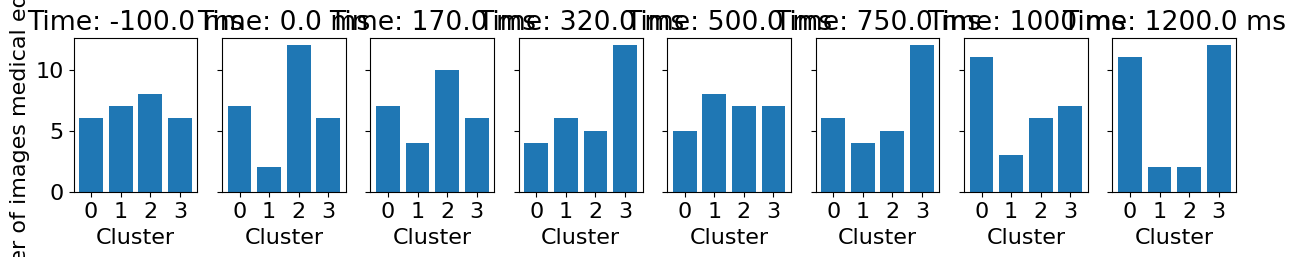

8it [00:00, 47.70it/s] [00:09<00:05,  1.73it/s]


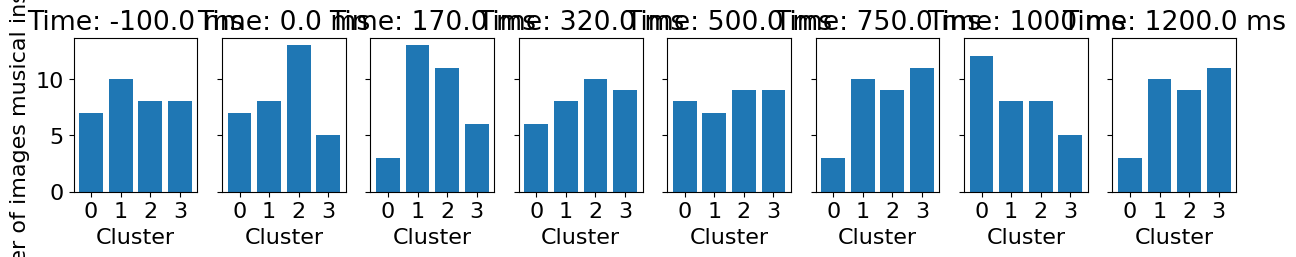

8it [00:00, 44.53it/s] [00:10<00:05,  1.75it/s]


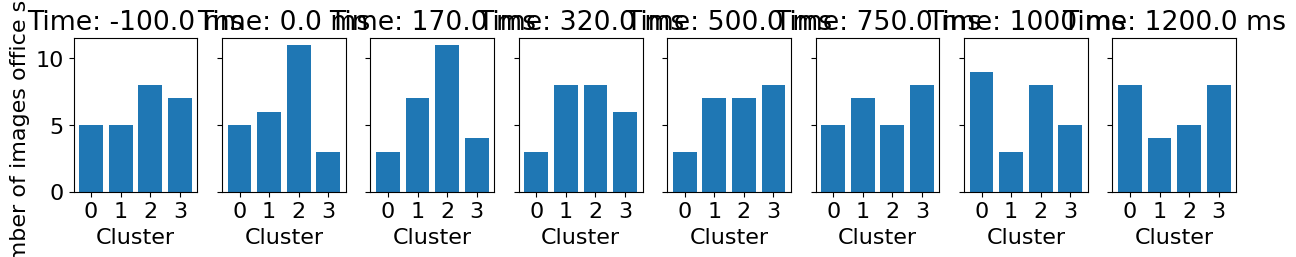

8it [00:00, 25.62it/s] [00:10<00:04,  1.74it/s]


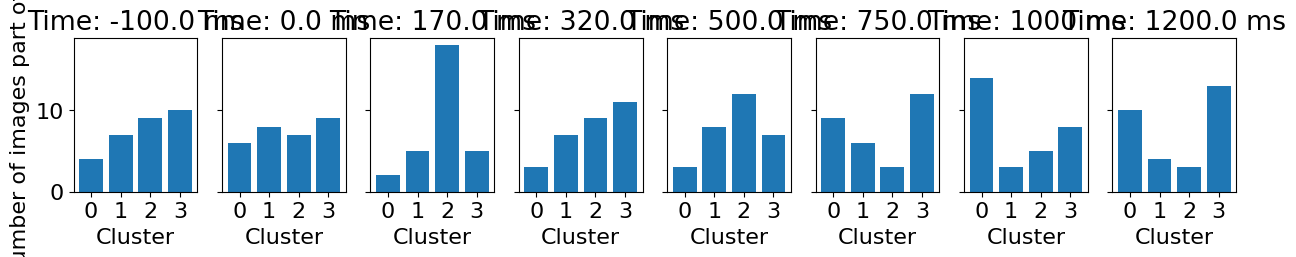

8it [00:00, 45.07it/s] [00:11<00:04,  1.69it/s]


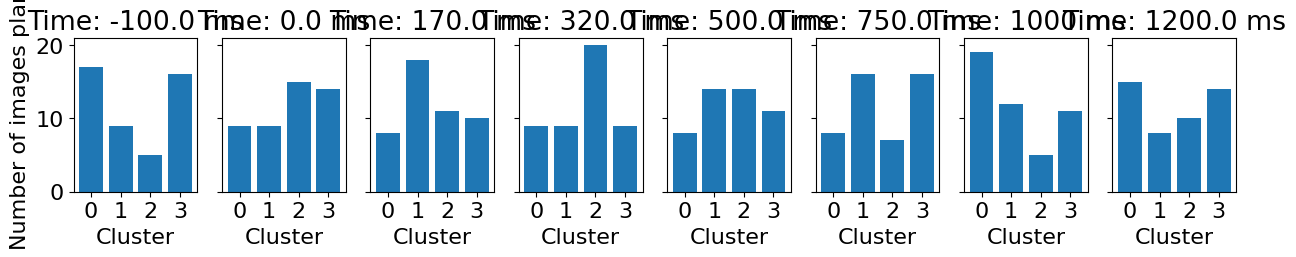

8it [00:00, 42.96it/s] [00:11<00:03,  1.71it/s]


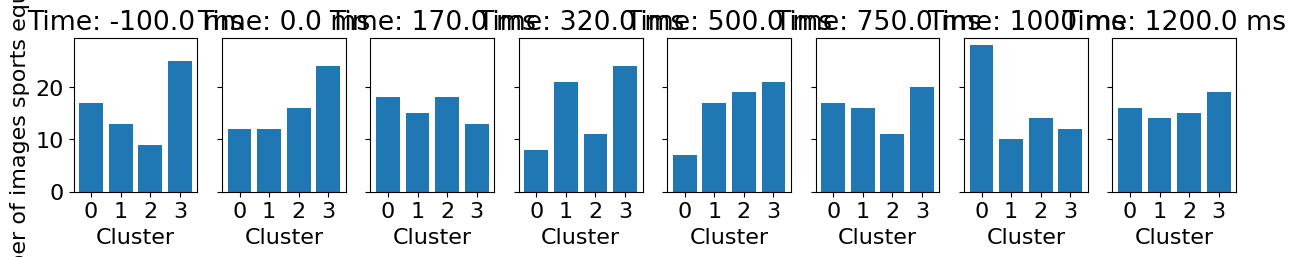

8it [00:00, 47.95it/s] [00:12<00:02,  1.69it/s]


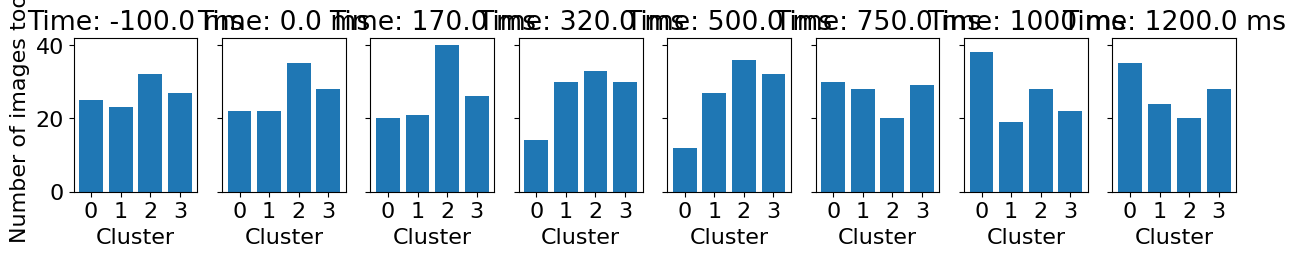

8it [00:00, 41.10it/s] [00:13<00:02,  1.72it/s]


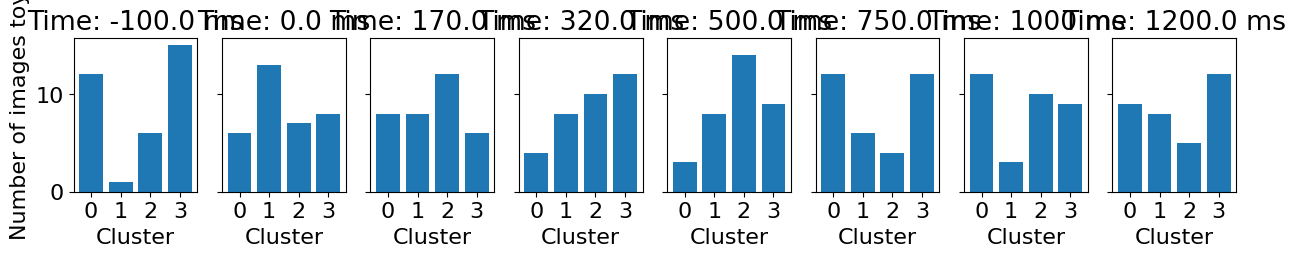

8it [00:00, 43.98it/s] [00:13<00:01,  1.70it/s]


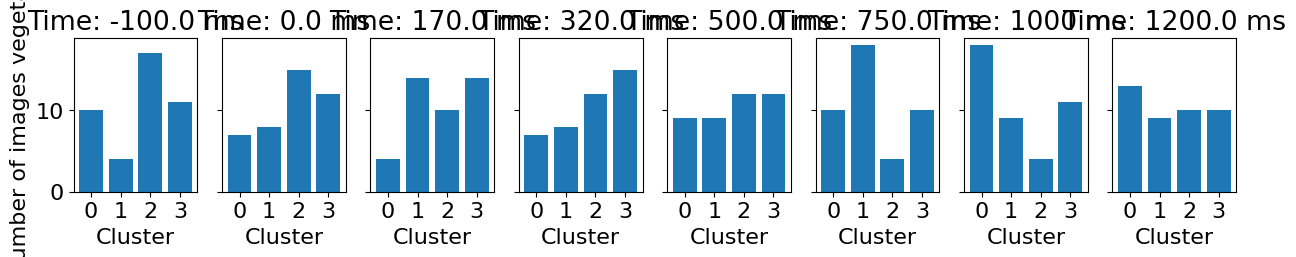

8it [00:00, 39.37it/s] [00:14<00:01,  1.79it/s]


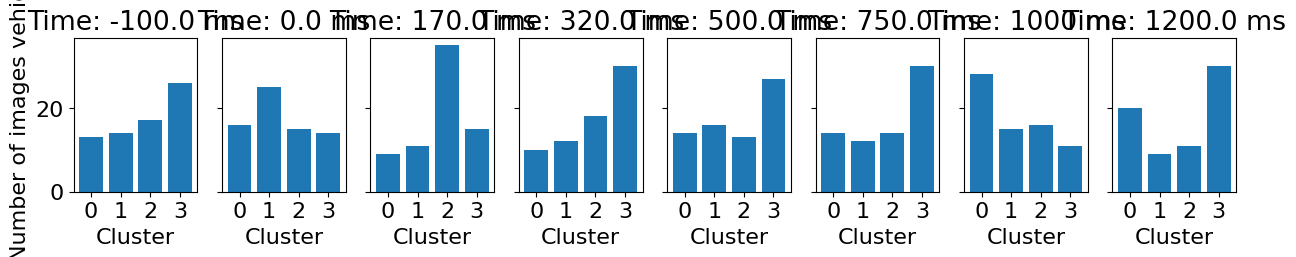

8it [00:00, 32.37it/s] [00:14<00:00,  1.83it/s]


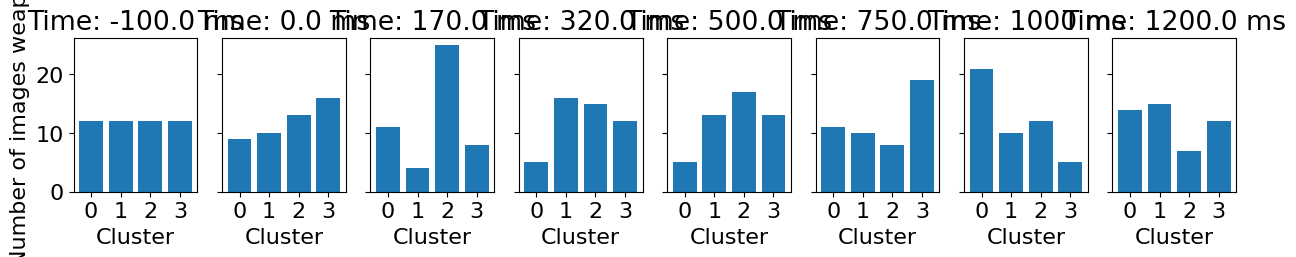

100%|██████████| 27/27 [00:15<00:00,  1.76it/s]


In [21]:
from tqdm import tqdm    
category27 = pd.read_csv('category27_manual.tsv', sep='\t')
for category_name in tqdm(category27.columns):
    # category_name = 'animal'
    f, axes = plt.subplots(1, len(times), sharex=True, sharey = True, figsize=(15, 2))   
    for i,t in tqdm(enumerate(times)):
        index = epochs.times == t
        data = average_concept_epochs[:, index, :].squeeze() 
        # print(data.shape)
        kmeans = KMeans(n_clusters=4, random_state=42).fit(data)
        labels = kmeans.labels_
        # # Get cluster centers
        centers = kmeans.cluster_centers_
        index_0 = np.where(labels == 0)[0]
        index_1 = np.where(labels == 1)[0]
        index_2 = np.where(labels == 2)[0]
        index_3 = np.where(labels == 3)[0]
        category = np.where(category27[category_name] == 1)[0]
        category_0 = len(np.intersect1d(category, index_0))
        category_1 = len(np.intersect1d(category, index_1))
        category_2 = len(np.intersect1d(category, index_2))
        category_3 = len(np.intersect1d(category, index_3)) 
    # #     # print(f"division of category: {category_0} vs {category_1}") 
        # plot these divisions are bar plot
        axes[i].bar(['0', '1', '2', '3'], [category_0, category_1, category_2, category_3])  
        axes[i].set_title(f"Time: {t*1000} ms")
        axes[0].set_ylabel(f'Number of images {category_name}')     
        axes[i].set_xlabel('Cluster')
    plt.show()  


## CLuster experiments end here

Trying NMF on a few time points


In [22]:
from sklearn.decomposition import NMF
